In [27]:
## Loading the required librarires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import PowerTransformer

In [275]:
df = pd.read_csv('C:/Users/gauta/OneDrive/Desktop/Regression_project_data.csv')
df.head()

Unnamed: 0             Y        V1         V2        V3        V4  \
0           1  3.955299e+07  2.705616   8.010346  4.124158  6.085618   
1           2  1.113885e+08  5.221836  10.097714  0.800022  8.442870   
2           3  4.091115e+07  4.288222   8.762010  3.751944  5.939178   
3           4  4.923284e+07  4.061546   9.595422  4.872827  6.791508   
4           5  1.040508e+08  4.788482   8.548239  1.529381  8.023423   

         V5        V6         V7        V8  V9  V10  
0  2.720406  6.666423   7.604752  6.165214   1    0  
1  0.409000  7.120131  10.637852  6.953741   1    0  
2  2.666111  6.113596   9.573163  4.890891   1    0  
3  0.049650  6.198104   9.166444  4.608687   1    0  
4  2.282913  8.070690   9.851151  6.101992   1    0

In [3]:
## deleting the unnamed column
del df['Unnamed: 0']


In [4]:
df.head()

Y        V1         V2        V3        V4        V5        V6  \
0  3.955299e+07  2.705616   8.010346  4.124158  6.085618  2.720406  6.666423   
1  1.113885e+08  5.221836  10.097714  0.800022  8.442870  0.409000  7.120131   
2  4.091115e+07  4.288222   8.762010  3.751944  5.939178  2.666111  6.113596   
3  4.923284e+07  4.061546   9.595422  4.872827  6.791508  0.049650  6.198104   
4  1.040508e+08  4.788482   8.548239  1.529381  8.023423  2.282913  8.070690   

          V7        V8  V9  V10  
0   7.604752  6.165214   1    0  
1  10.637852  6.953741   1    0  
2   9.573163  4.890891   1    0  
3   9.166444  4.608687   1    0  
4   9.851151  6.101992   1    0

In [5]:
print(df.dtypes)

Y      float64
V1     float64
V2     float64
V3     float64
V4     float64
V5     float64
V6     float64
V7     float64
V8     float64
V9       int64
V10      int64
dtype: object


In [6]:
print(df.shape)

(300, 11)


In [7]:
df.isnull().sum()

Y      0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
dtype: int64

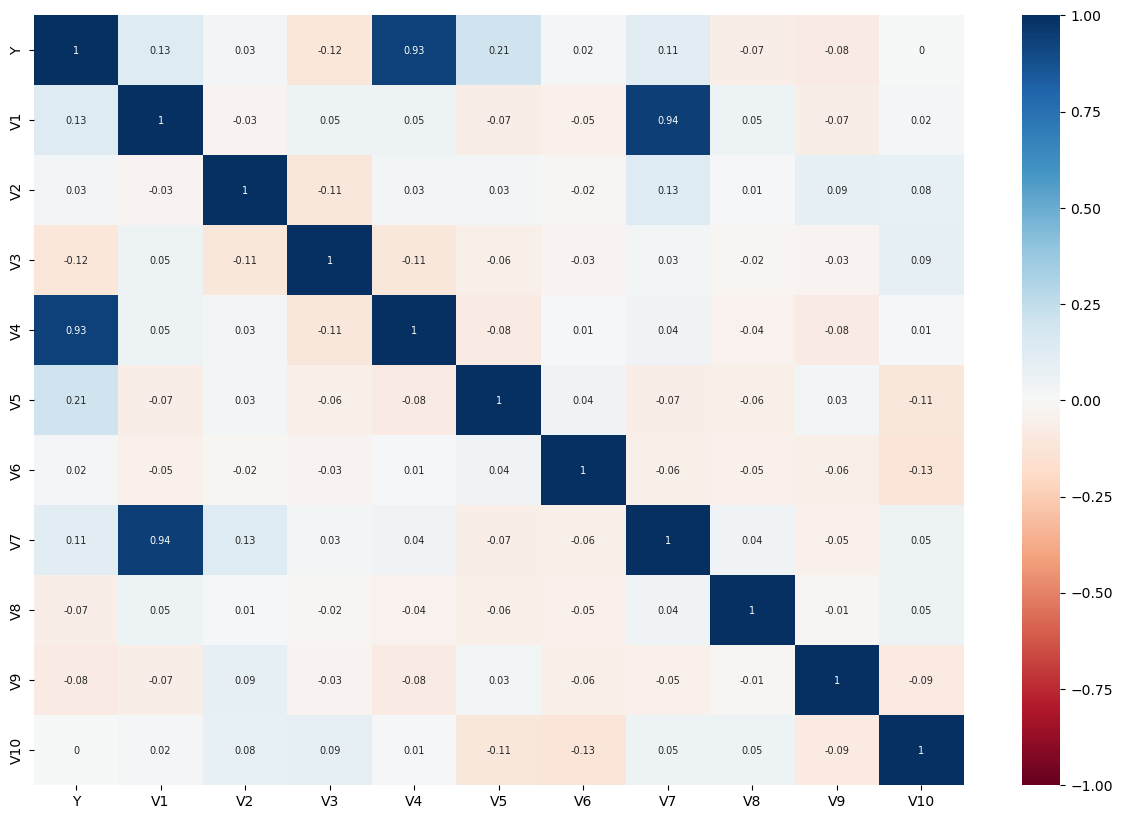

In [8]:
## Correlation Heat-map 
plt.figure(figsize=(15,10))
correlations = df.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1); 

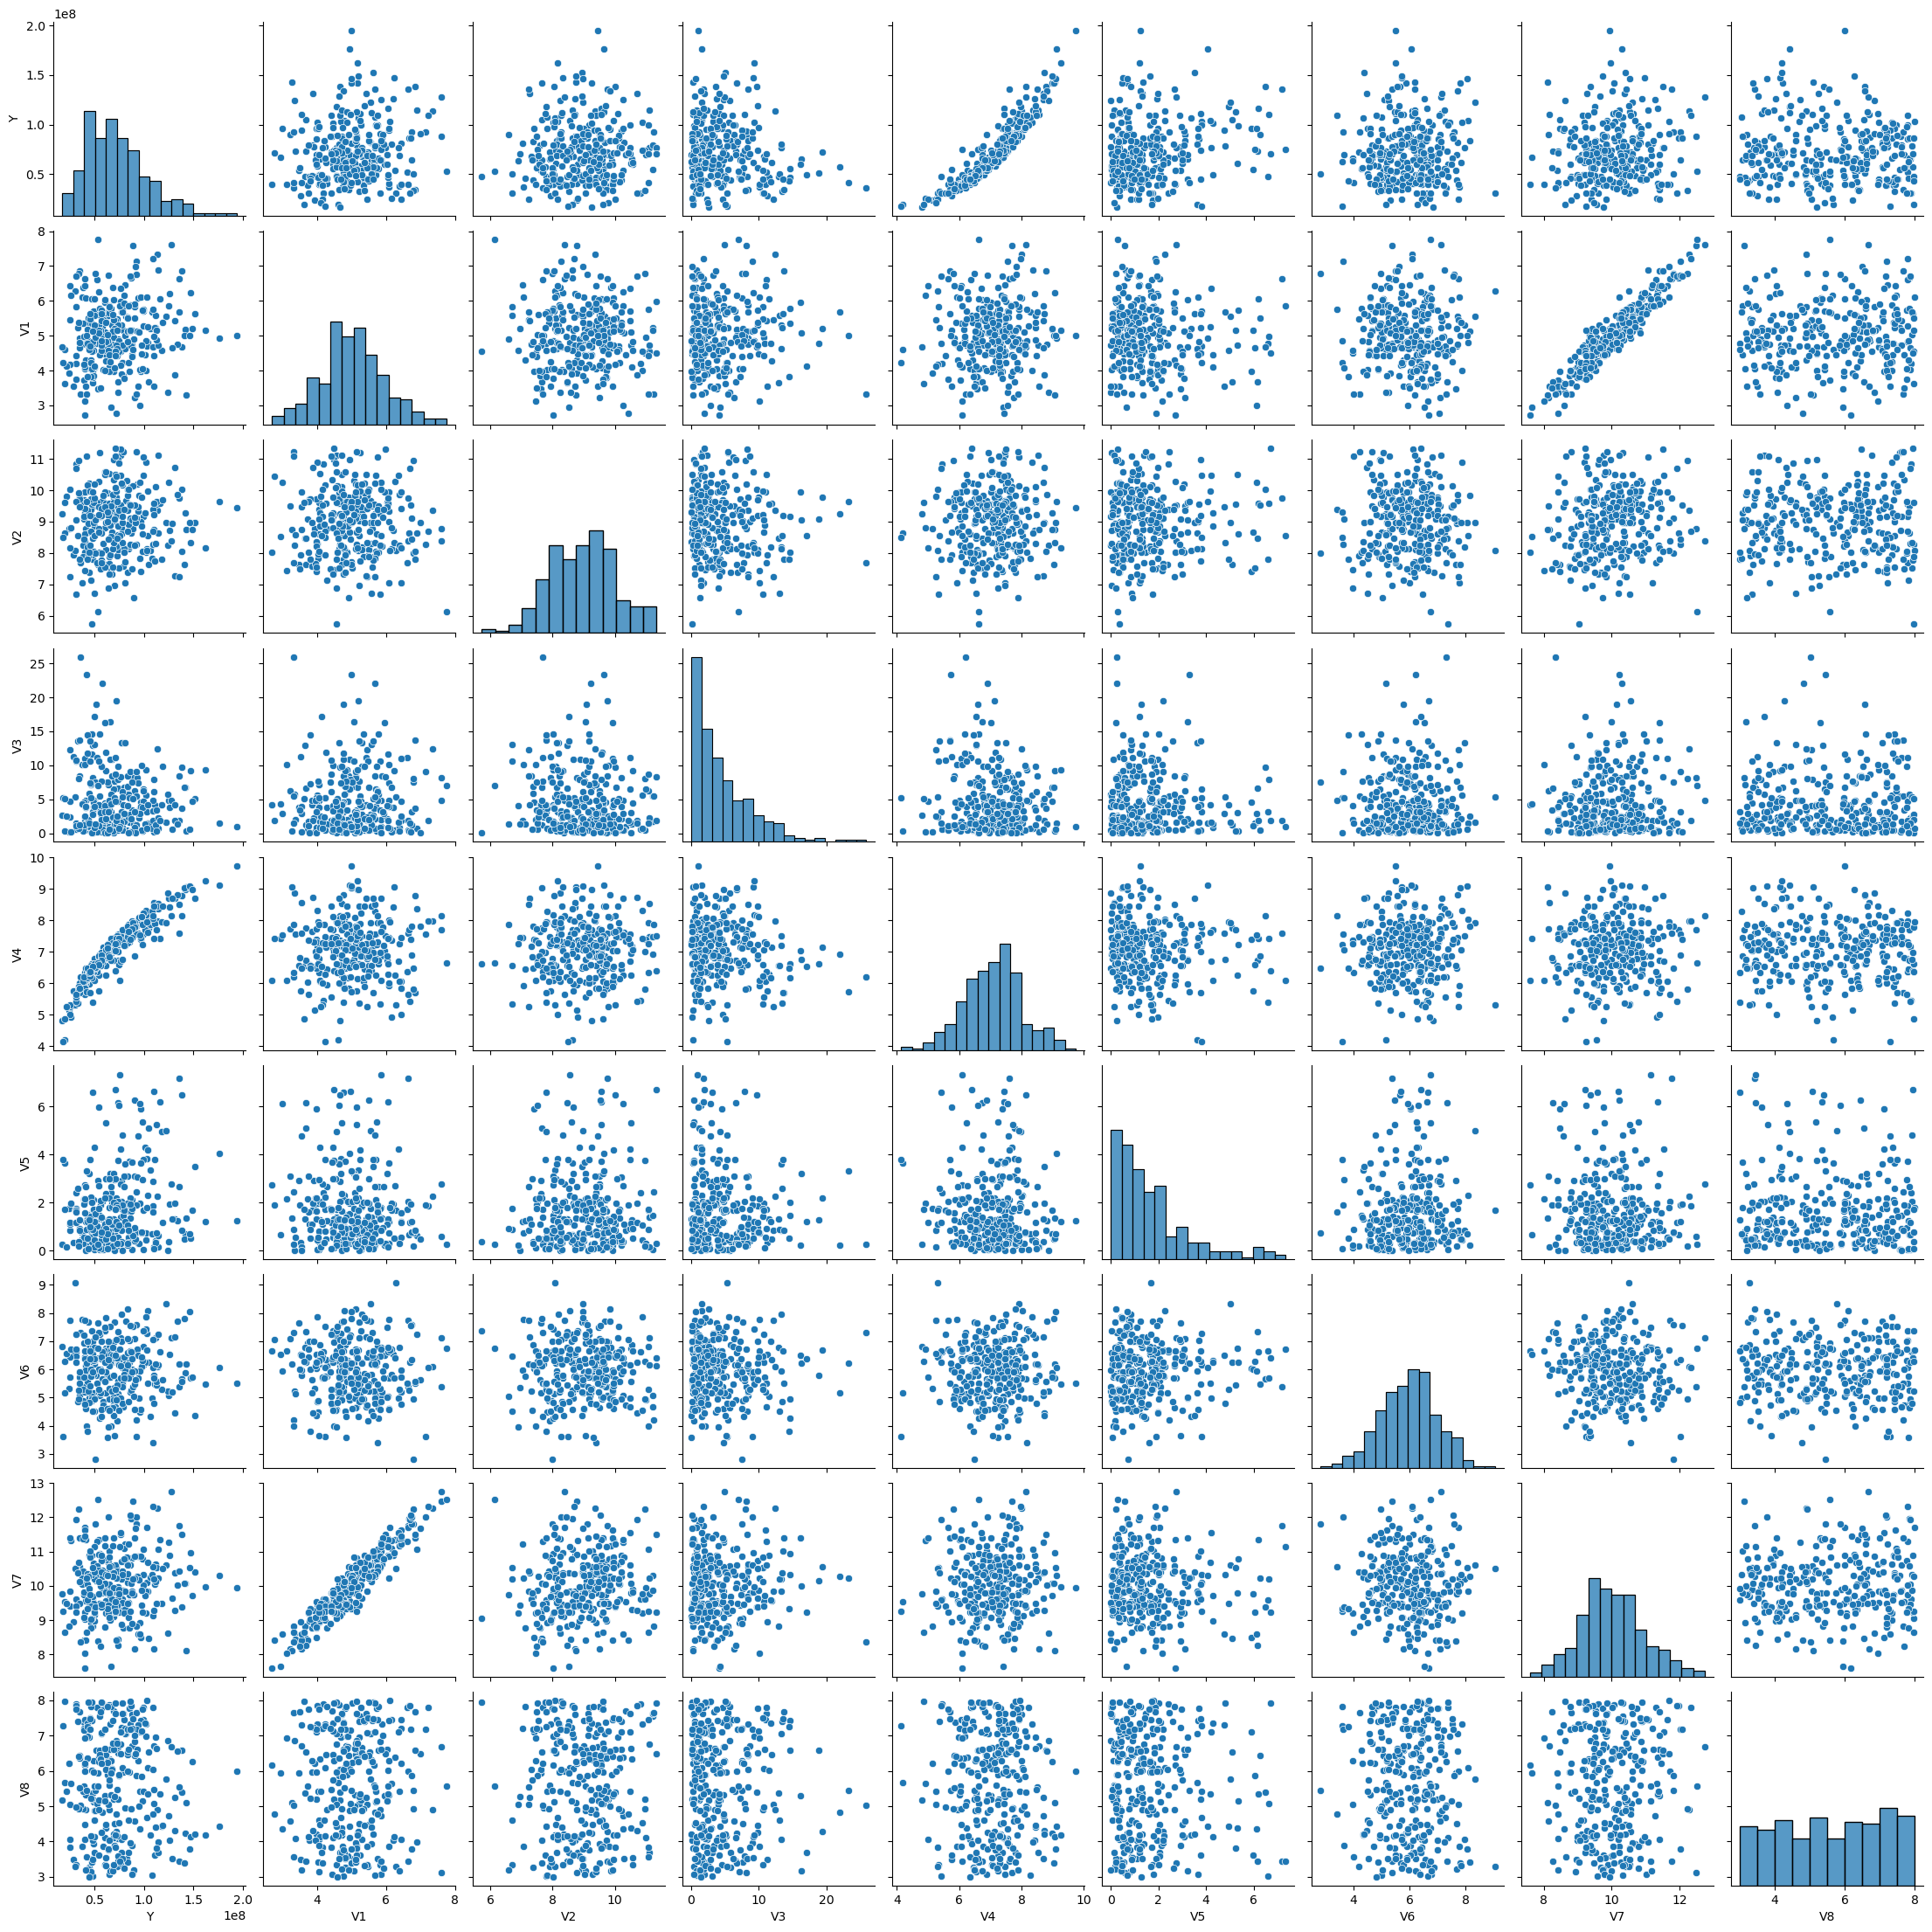

In [9]:
## Pairs plot with density ccurve
sns.pairplot(df[['Y','V1','V2','V3','V4','V5','V6','V7','V8']])
plt.show()


## Univariate Regreession

## 1. Y vs V1

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     5.056
Date:                Tue, 25 Apr 2023   Prob (F-statistic):             0.0253
Time:                        14:48:58   Log-Likelihood:                -5592.7
No. Observations:                 300   AIC:                         1.119e+04
Df Residuals:                     298   BIC:                         1.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.092e+07   9.72e+06      5.241      0.0

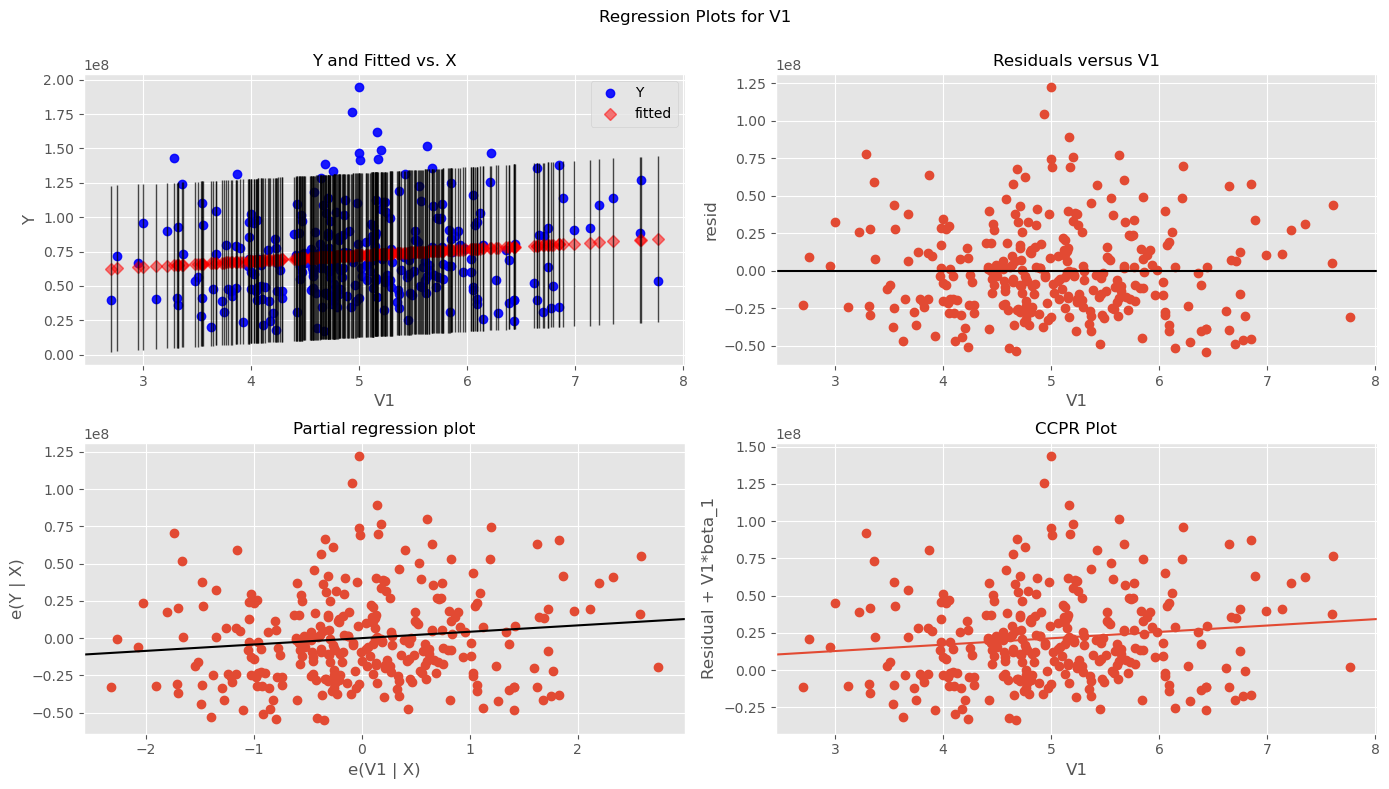

In [11]:
from statsmodels.formula.api import ols
# fit simple linear regression model
linear_model_V1 = ols('Y ~ V1',
                   data=df).fit()
  
# display model summary
print(linear_model_V1.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model_V1,
                                    'V1',
                                    fig=fig)

## 2. Y v|s V2


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2690
Date:                Tue, 25 Apr 2023   Prob (F-statistic):              0.604
Time:                        14:49:22   Log-Likelihood:                -5595.1
No. Observations:                 300   AIC:                         1.119e+04
Df Residuals:                     298   BIC:                         1.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.451e+07   1.53e+07      4.204      0.0

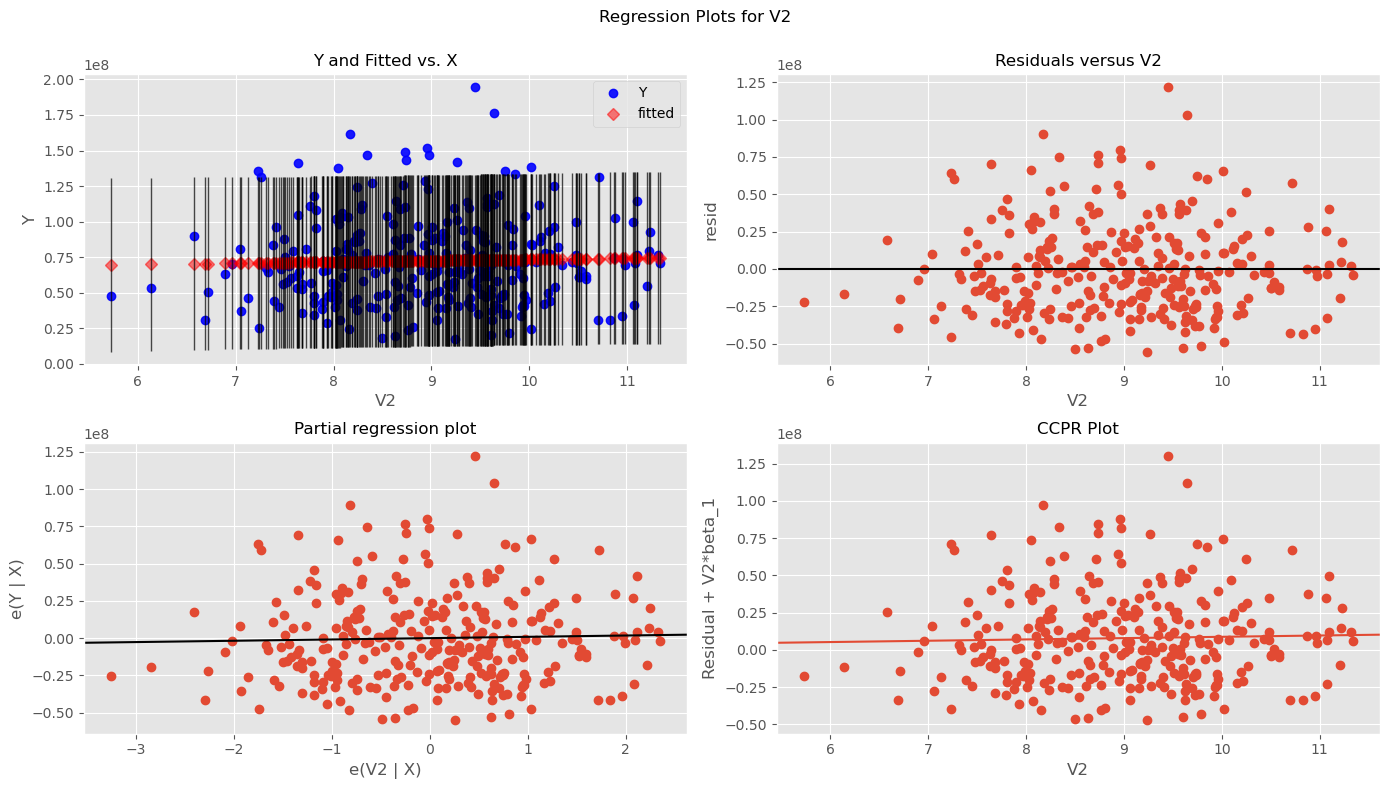

In [12]:
# fit simple linear regression model
linear_model_V2 = ols('Y ~ V2',
                   data=df).fit()
  
# display model summary
print(linear_model_V2.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model_V2,
                                    'V2',
                                    fig=fig)

## 3. Y v|s V3

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.328
Date:                Tue, 25 Apr 2023   Prob (F-statistic):             0.0384
Time:                        14:49:27   Log-Likelihood:                -5593.1
No. Observations:                 300   AIC:                         1.119e+04
Df Residuals:                     298   BIC:                         1.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    7.62e+07   2.53e+06     30.161      0.0

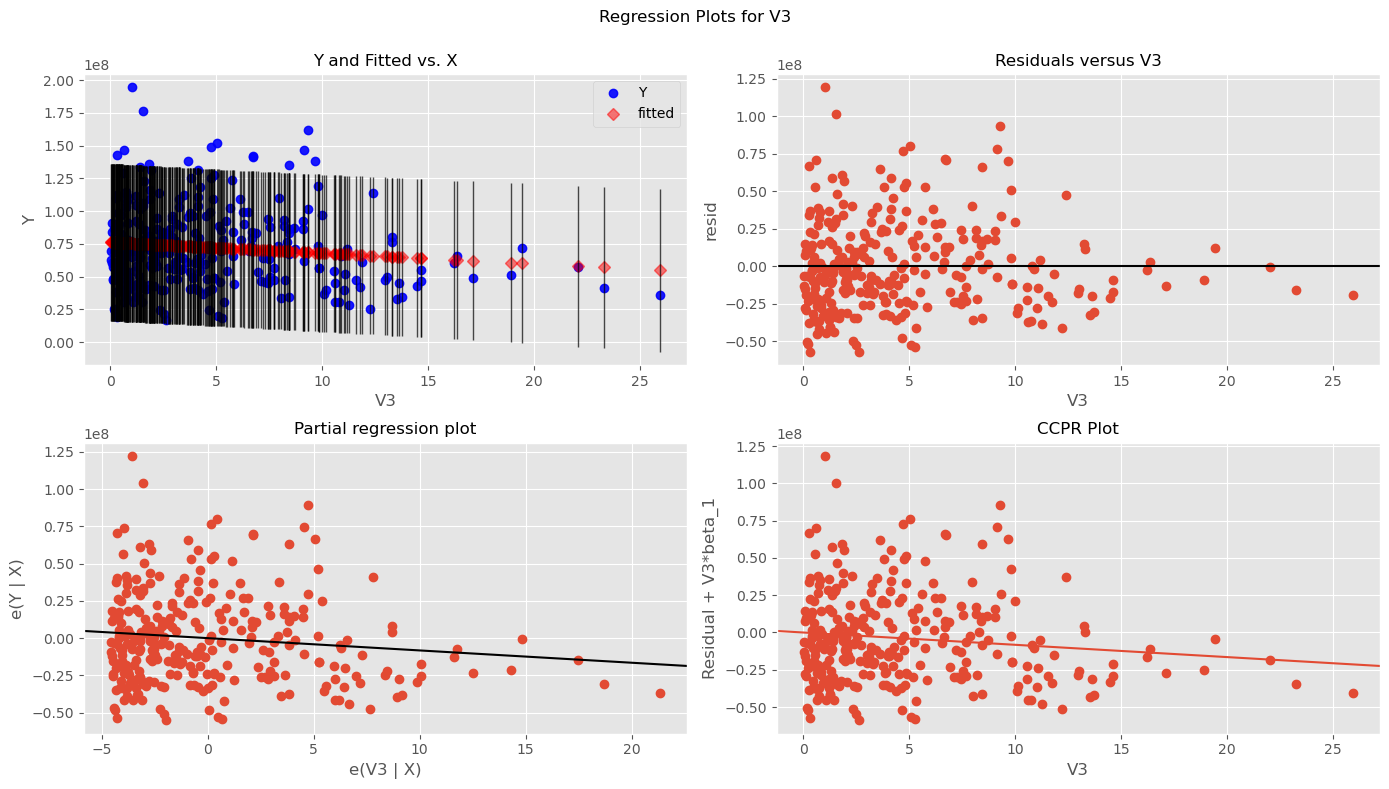

In [13]:
# fit simple linear regression model
linear_model_V3 = ols('Y ~ V3',
                   data=df).fit()
  
# display model summary
print(linear_model_V3.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model_V3,
                                    'V3',
                                    fig=fig)

## 4. Y v|s V4

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1865.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          2.64e-130
Time:                        14:49:32   Log-Likelihood:                -5297.9
No. Observations:                 300   AIC:                         1.060e+04
Df Residuals:                     298   BIC:                         1.061e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.433e+08   5.04e+06    -28.447      0.0

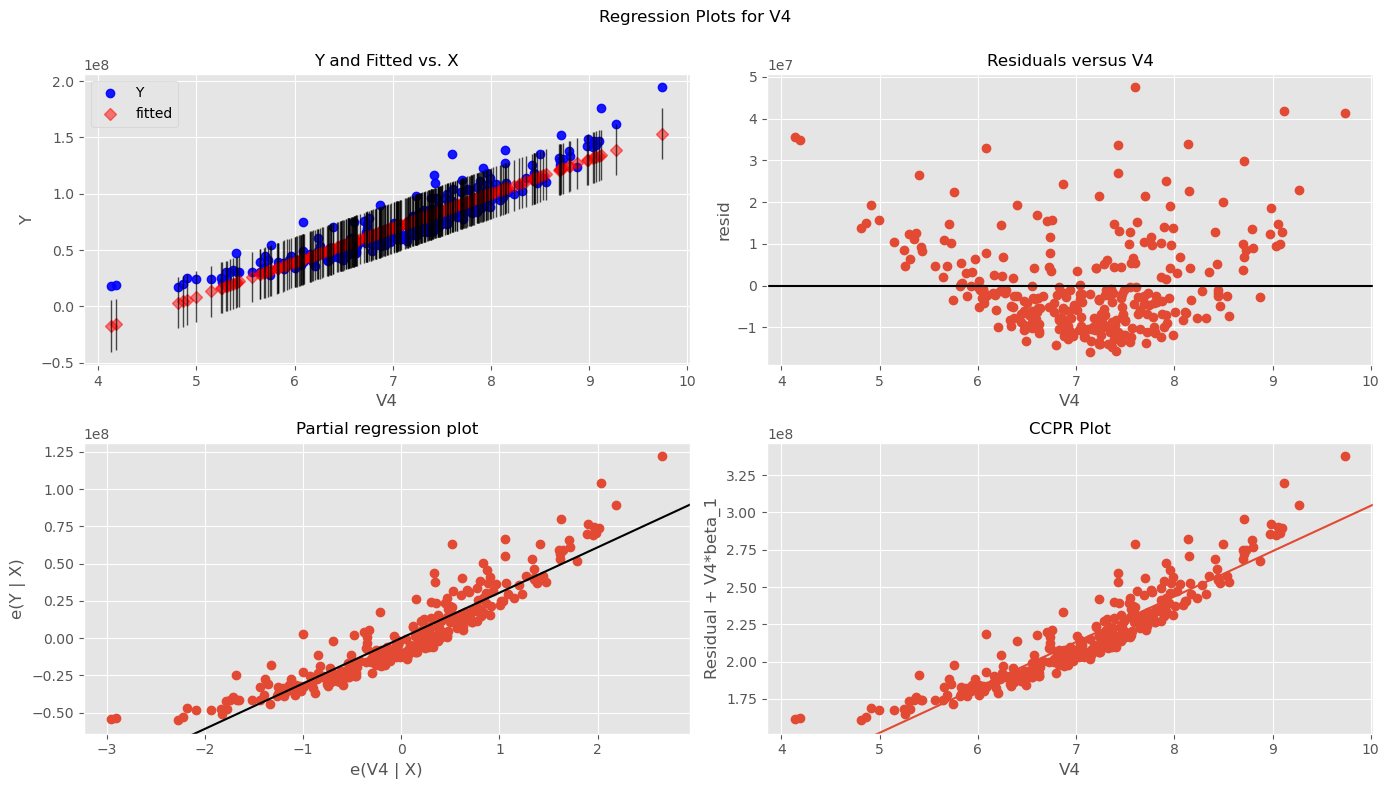

In [14]:
# fit simple linear regression model
linear_model_V4 = ols('Y ~ V4',
                   data=df).fit()
  
# display model summary
print(linear_model_V4.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model_V4,
                                    'V4',
                                    fig=fig)

## 5. Y v|s V5

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     13.13
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           0.000341
Time:                        14:49:41   Log-Likelihood:                -5588.8
No. Observations:                 300   AIC:                         1.118e+04
Df Residuals:                     298   BIC:                         1.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.553e+07   2.57e+06     25.532      0.0

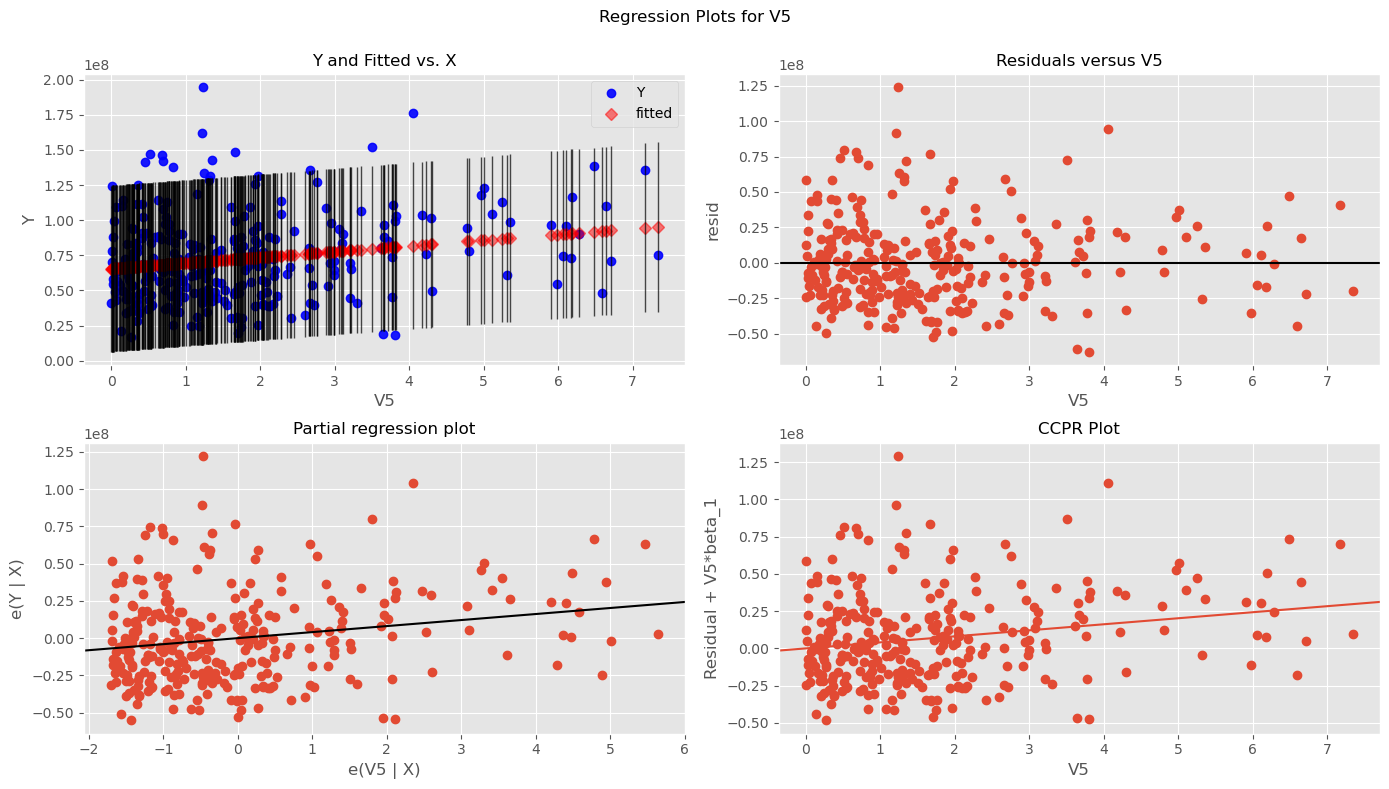

In [15]:
# fit simple linear regression model
linear_model_V5 = ols('Y ~ V5',
                   data=df).fit()
  
# display model summary
print(linear_model_V5.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model_V5,
                                    'V5',
                                    fig=fig)

## 6. Y v|s V6

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1796
Date:                Tue, 25 Apr 2023   Prob (F-statistic):              0.672
Time:                        14:49:47   Log-Likelihood:                -5595.2
No. Observations:                 300   AIC:                         1.119e+04
Df Residuals:                     298   BIC:                         1.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.797e+07   1.06e+07      6.392      0.0

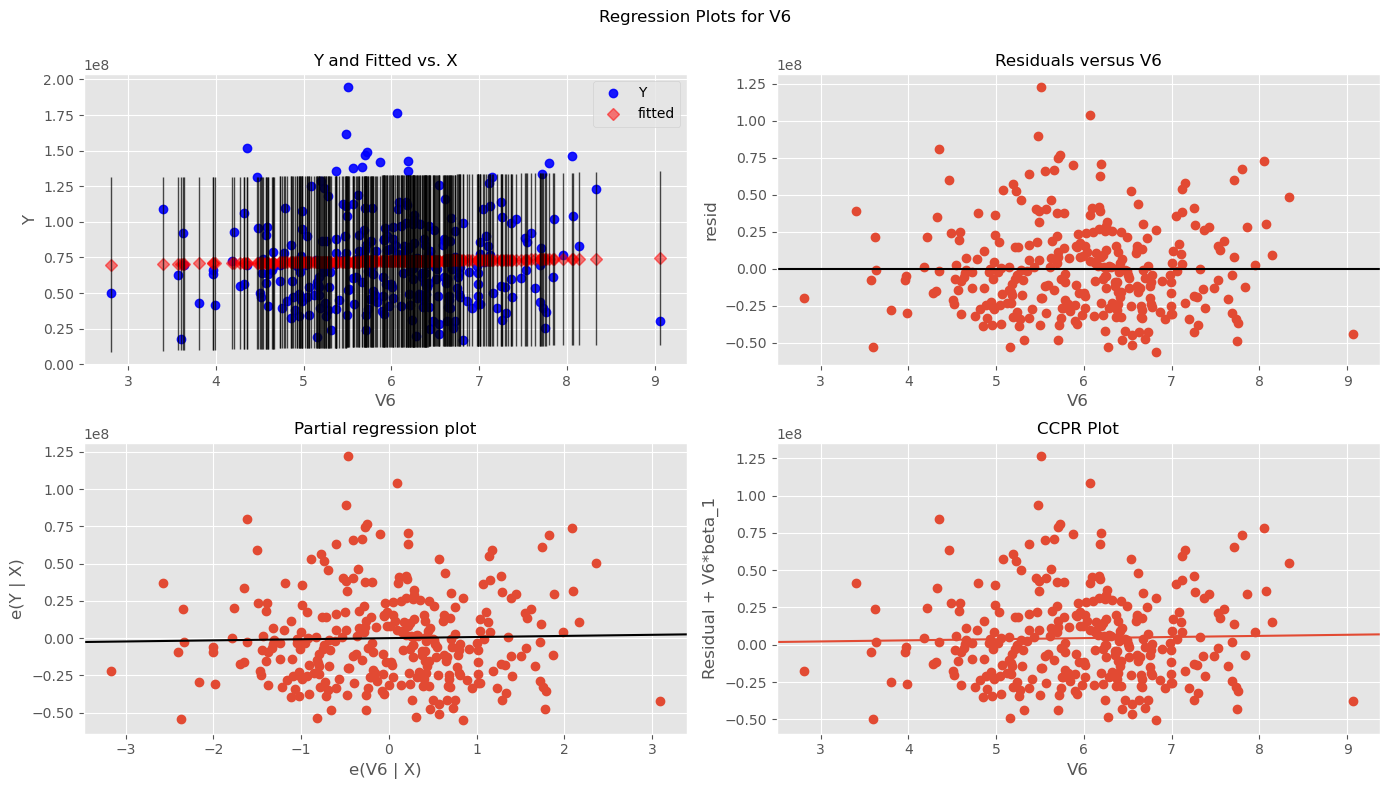

In [16]:
# fit simple linear regression model
linear_model_V6 = ols('Y ~ V6',
                   data=df).fit()
  
# display model summary
print(linear_model_V6.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model_V6,
                                    'V6',
                                    fig=fig)

## 7. Y v|s V7

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.792
Date:                Tue, 25 Apr 2023   Prob (F-statistic):             0.0524
Time:                        14:49:51   Log-Likelihood:                -5593.4
No. Observations:                 300   AIC:                         1.119e+04
Df Residuals:                     298   BIC:                         1.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.576e+07   1.89e+07      1.891      0.0

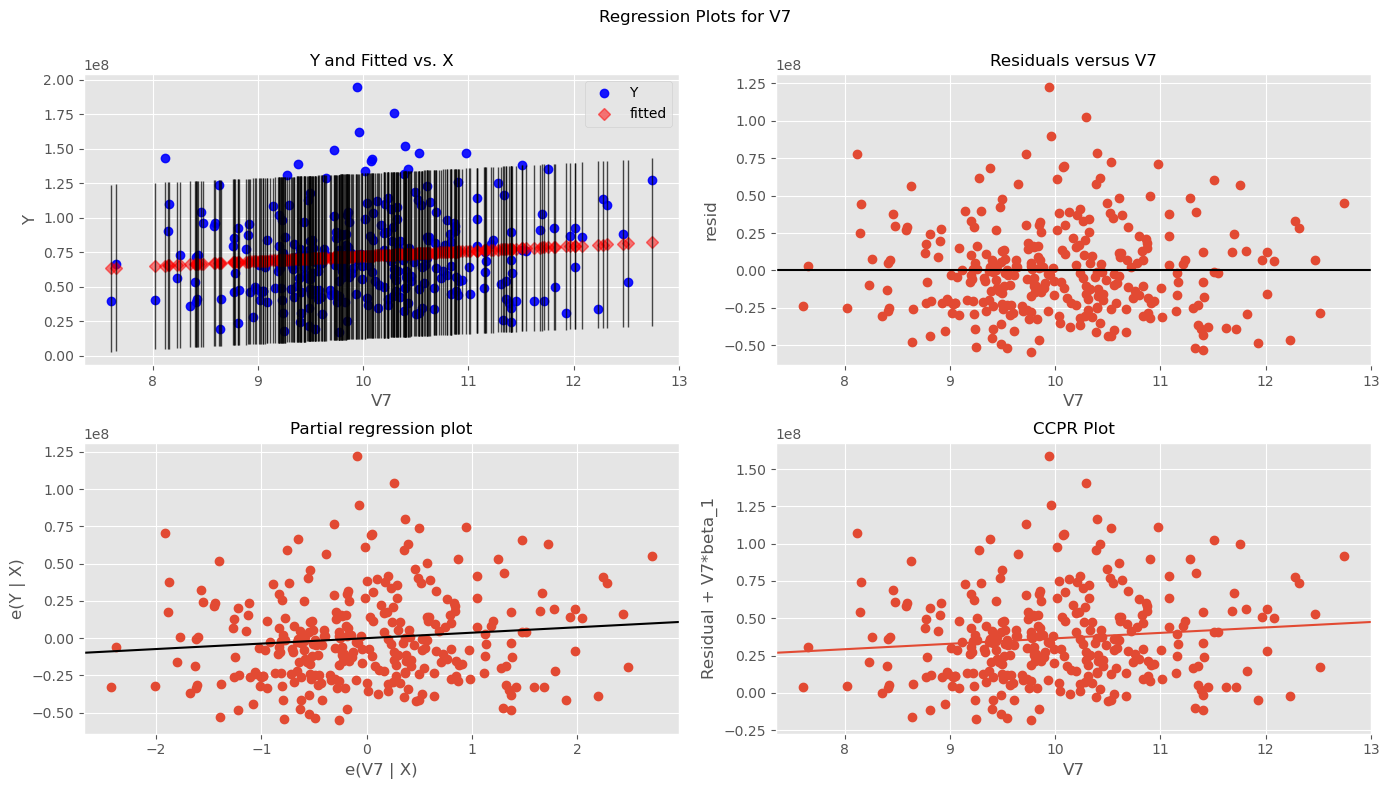

In [17]:
# fit simple linear regression model
linear_model_V7 = ols('Y ~ V7',
                   data=df).fit()
  
# display model summary
print(linear_model_V7.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model_V7,
                                    'V7',
                                    fig=fig)

## 8. Y v|s V8

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.308
Date:                Tue, 25 Apr 2023   Prob (F-statistic):              0.254
Time:                        14:49:54   Log-Likelihood:                -5594.6
No. Observations:                 300   AIC:                         1.119e+04
Df Residuals:                     298   BIC:                         1.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.005e+07    6.9e+06     11.593      0.0

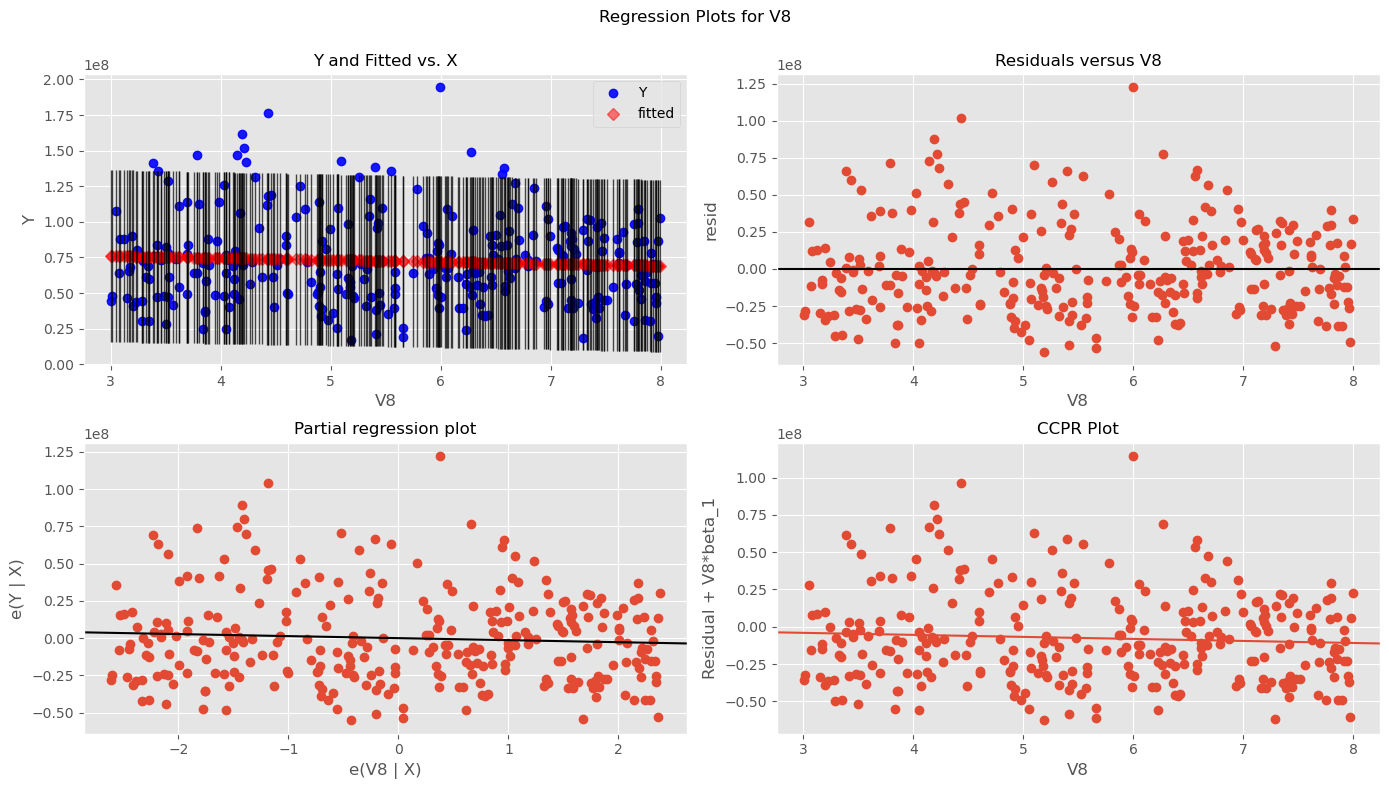

In [18]:
# fit simple linear regression model
linear_model_V8 = ols('Y ~ V8',
                   data=df).fit()
  
# display model summary
print(linear_model_V8.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model_V8,
                                    'V8',
                                    fig=fig)

## 9. Y v|s V9

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.123
Date:                Tue, 25 Apr 2023   Prob (F-statistic):              0.146
Time:                        14:49:59   Log-Likelihood:                -5594.2
No. Observations:                 300   AIC:                         1.119e+04
Df Residuals:                     298   BIC:                         1.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.885e+07   4.76e+06     16.578      0.0

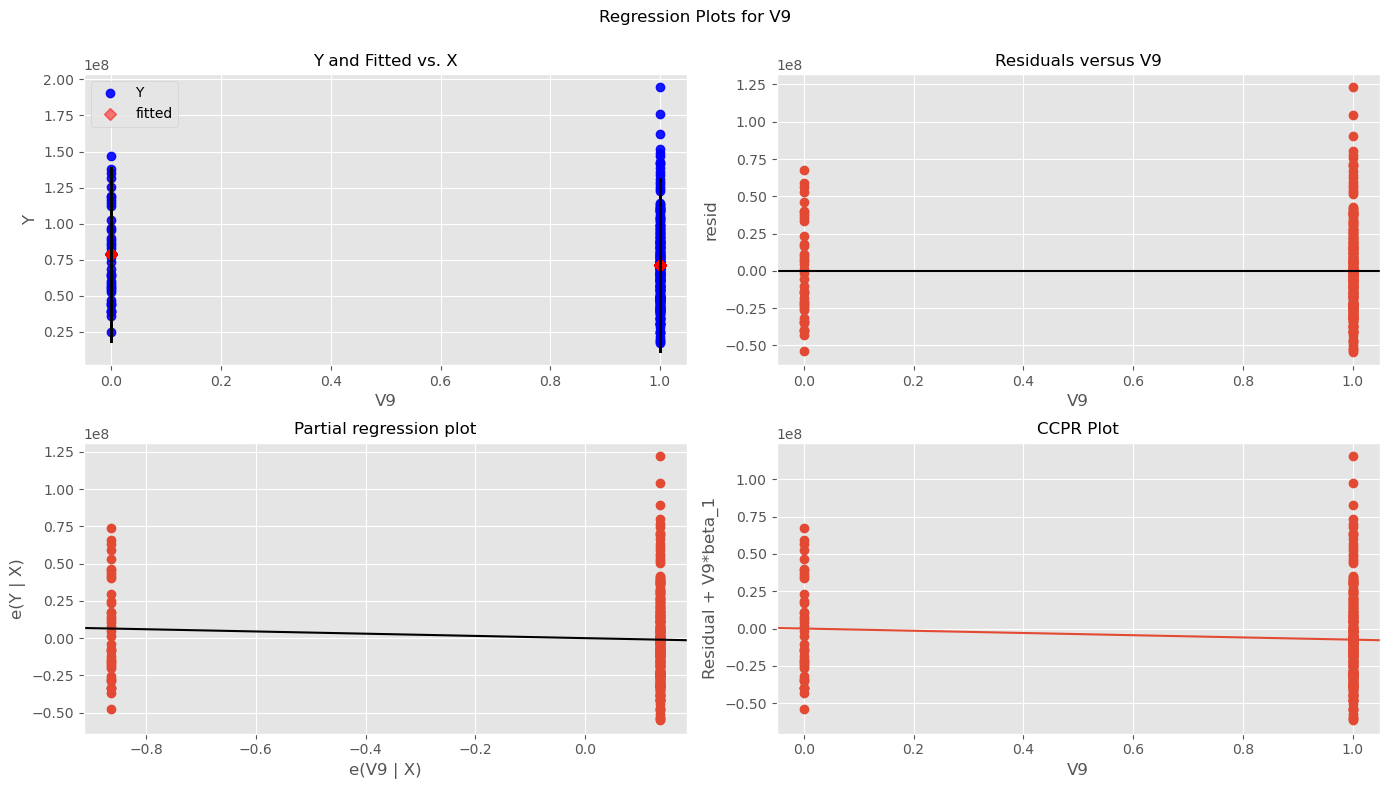

In [19]:
# fit simple linear regression model
linear_model_V9 = ols('Y ~ V9',
                   data=df).fit()
  
# display model summary
print(linear_model_V9.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model_V9,
                                    'V9',
                                    fig=fig)

## 10. Y v|s V10

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                 0.0003251
Date:                Tue, 25 Apr 2023   Prob (F-statistic):              0.986
Time:                        14:50:02   Log-Likelihood:                -5595.3
No. Observations:                 300   AIC:                         1.119e+04
Df Residuals:                     298   BIC:                         1.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    7.24e+07    1.9e+06     38.048      0.0

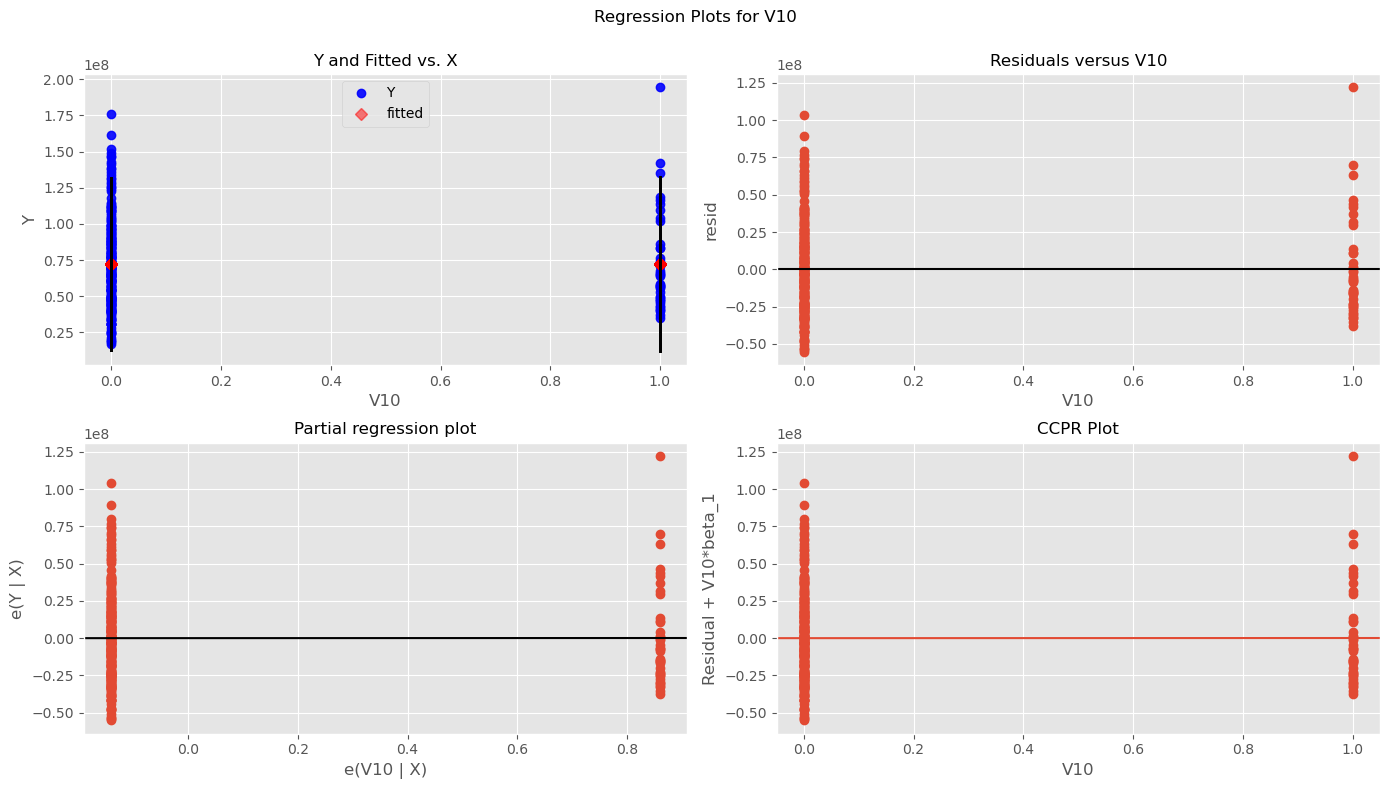

In [20]:
# fit simple linear regression model
linear_model_V10 = ols('Y ~ V10',
                   data=df).fit()
  
# display model summary
print(linear_model_V10.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model_V10,
                                    'V10',
                                    fig=fig)


## Multivariate Analysis

In [21]:
## Spliiting the dataset
## train test split 
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Y'])
y = df.iloc[:,0]



In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [333]:
X_train = data_stat_model.add_constant(X_train) 
X_test = data_stat_model.add_constant(X_test) 
X_test.head()

const        V1         V2        V3        V4        V5        V6  \
203    1.0  4.492399  11.335577  1.882479  6.393998  6.708380  6.395556   
266    1.0  6.851933   8.046844  3.651743  8.794487  0.828996  5.560126   
152    1.0  5.682339   7.824916  0.770950  8.285431  0.692489  4.984963   
9      1.0  4.852295   9.006450  8.674073  7.896944  0.415595  5.918222   
233    1.0  6.358627  10.480550  1.582386  6.702799  4.222613  4.975033   

            V7        V8  V9  V10  
203   9.219046  7.927108   1    0  
266  11.512046  6.578809   0    0  
152  10.323026  3.050583   1    0  
9     9.794931  6.711999   1    0  
233  11.542387  7.112359   1    0

In [328]:
y_train

232    8.645148e+07
59     5.789640e+07
6      1.045229e+08
185    3.916703e+07
173    5.690052e+07
           ...     
188    7.027234e+07
71     6.541440e+07
106    7.674542e+07
270    8.895474e+07
102    4.861785e+07
Name: Y, Length: 240, dtype: float64

In [334]:
## APPLYING MULTIPLE LINEAR REGRESSION BLINDELY ON THE WHOLE DATA
import statsmodels.api as data_stat_model 

data_OLS_result1 = data_stat_model.OLS(y_train, X_train).fit()
print(data_OLS_result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     430.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          2.41e-142
Time:                        20:07:29   Log-Likelihood:                -4112.5
No. Observations:                 240   AIC:                             8247.
Df Residuals:                     229   BIC:                             8285.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.736e+08   9.78e+06    -17.751      0.0

In [45]:
from statsmodels.stats.anova import anova_lm
data_stat_model.stats.anova_lm(data_OLS_result1, typ=2)

AttributeError: 'PandasData' object has no attribute 'design_info'

In [41]:
#from statsmodels.stats.anova import anova_lm
#table = sm.stats.anova_lm(data_OLS_result1, typ=2)
#print(data_OLS_result1.anova)

In [335]:
print(data_OLS_result1.predict(X_test).head())
print(y_test.head())

203    7.600208e+07
266    1.252771e+08
152    1.065448e+08
9      8.887009e+07
233    7.839875e+07
dtype: float64
203    7.061159e+07
266    1.380304e+08
152    1.077723e+08
9      8.731712e+07
233    7.627696e+07
Name: Y, dtype: float64


## Model validation

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


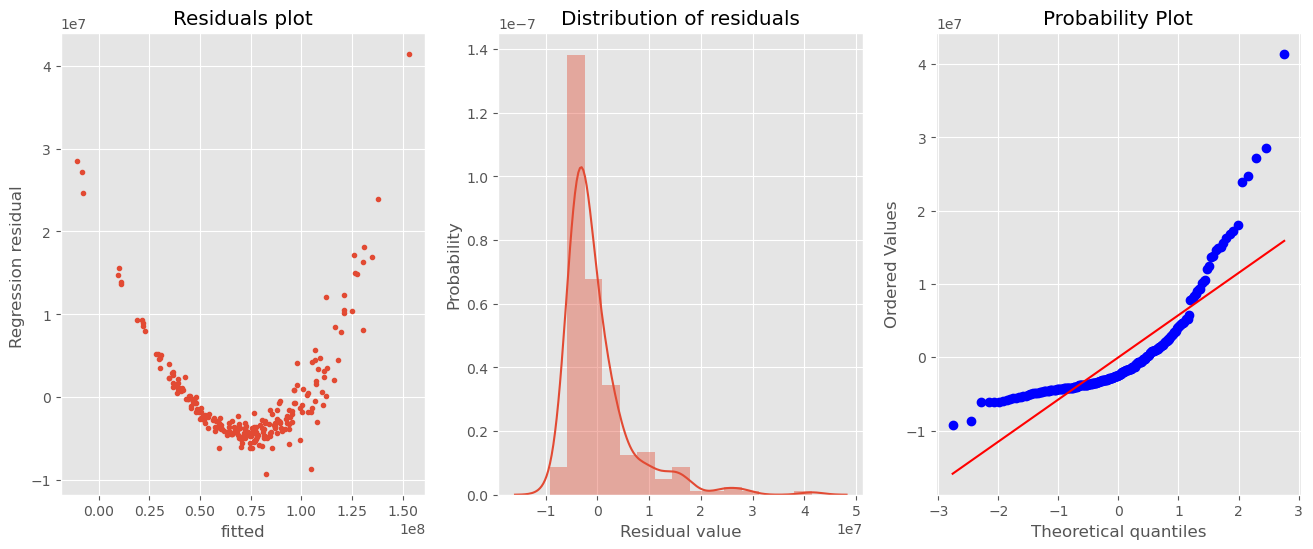

In [336]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(data_OLS_result1.fittedvalues,data_OLS_result1.resid, marker = '.', linestyle = 'none')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(data_OLS_result1.resid,ax = ax2, bins = 15)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(data_OLS_result1.resid, dist = "norm", plot = plt)
plt.show()


## Making predictions

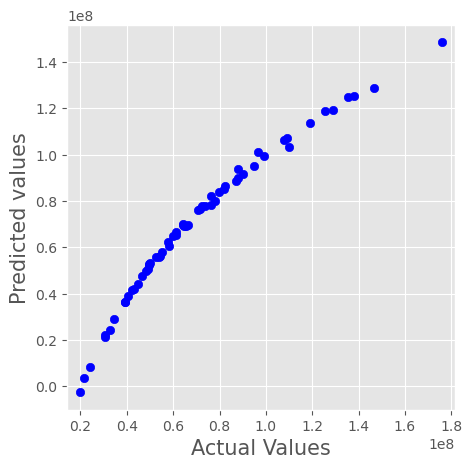

In [337]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, data_OLS_result1.predict(X_test), c='blue')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.grid(True)
plt.show()


# Transformation


C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


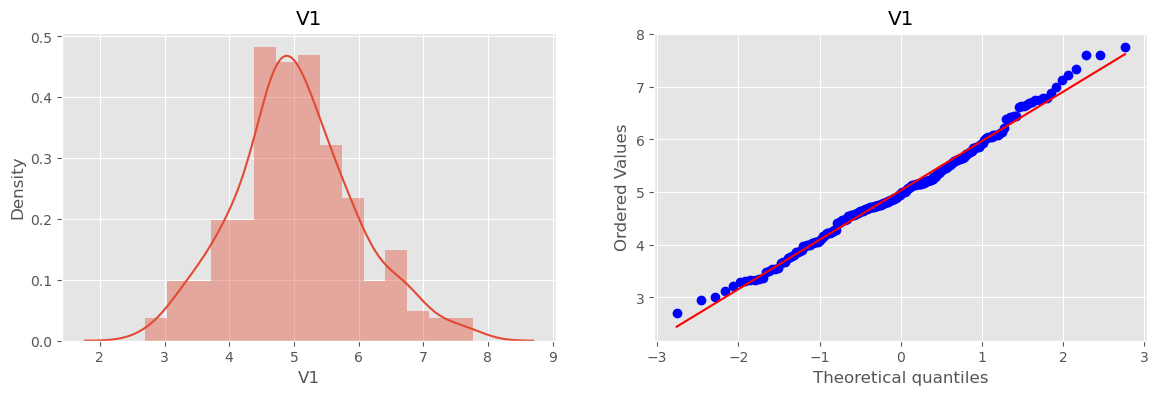

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


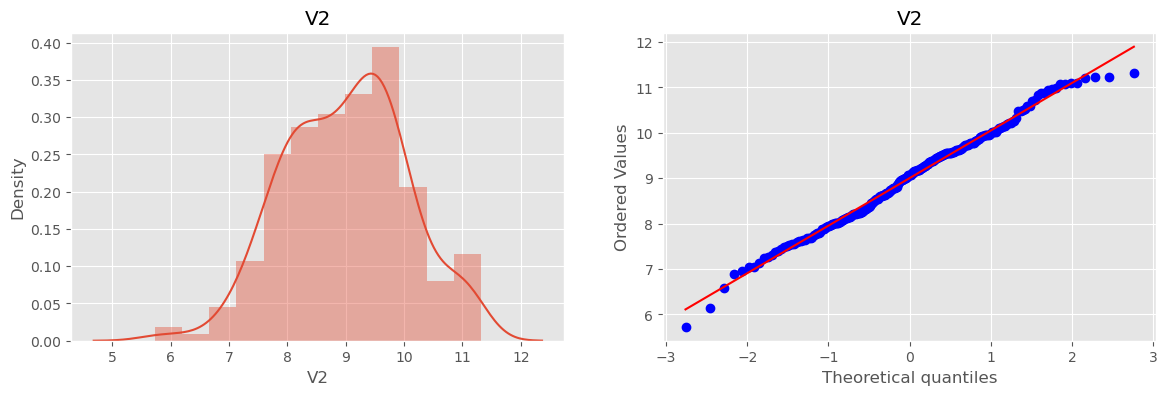

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


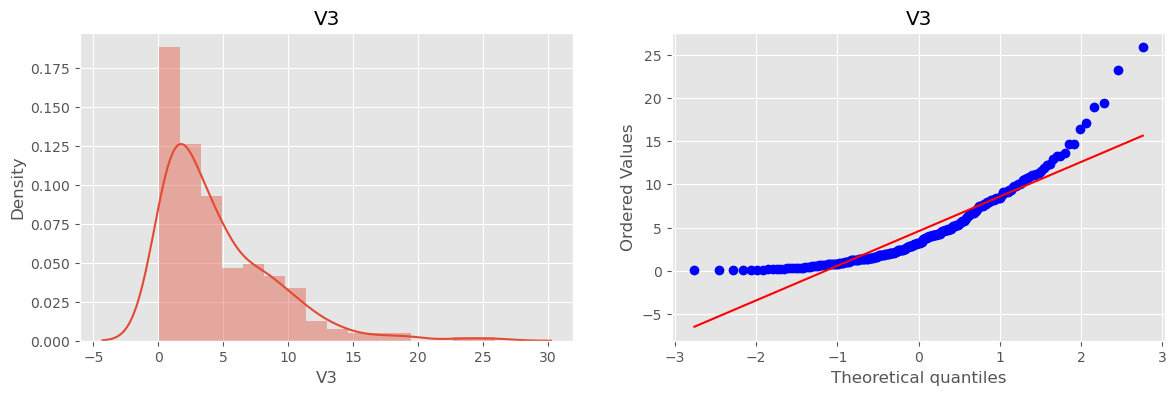

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


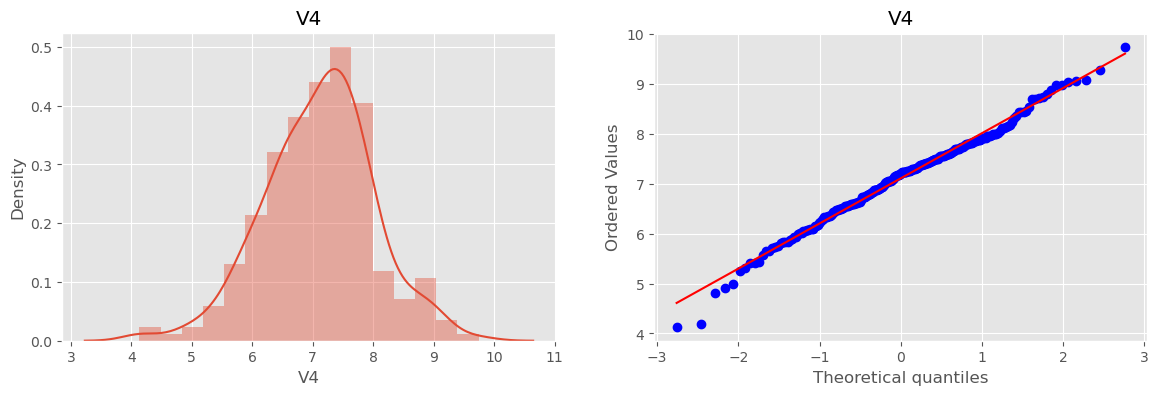

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


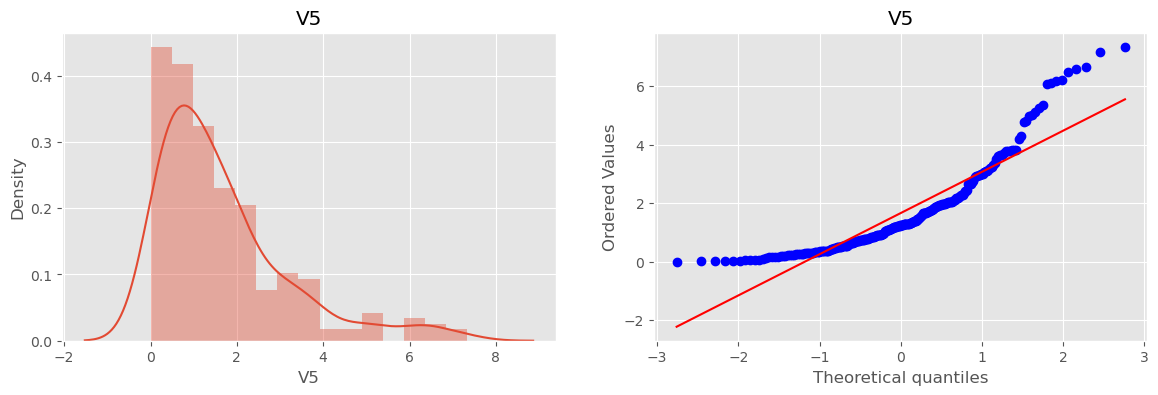

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


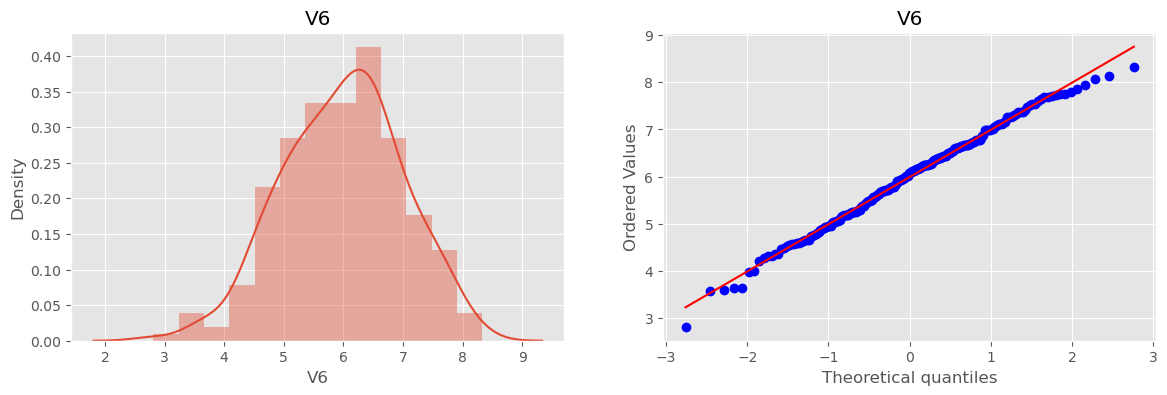

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


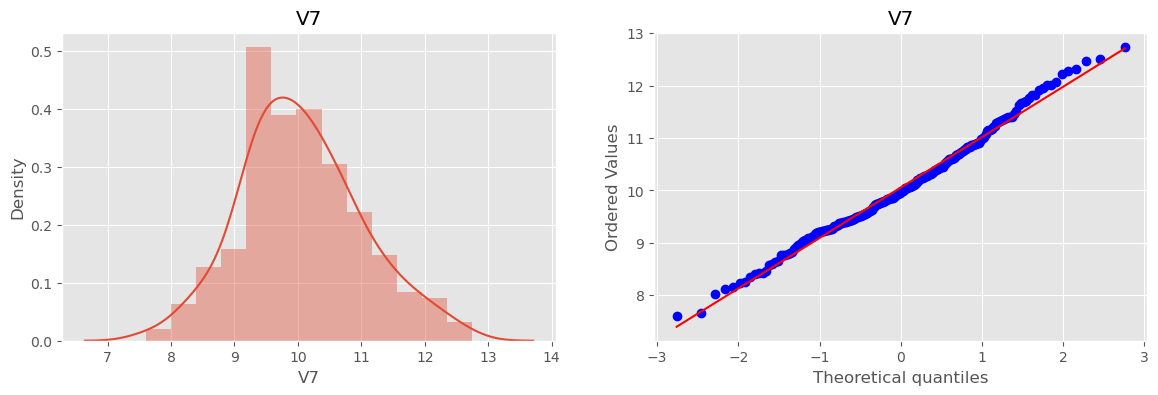

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


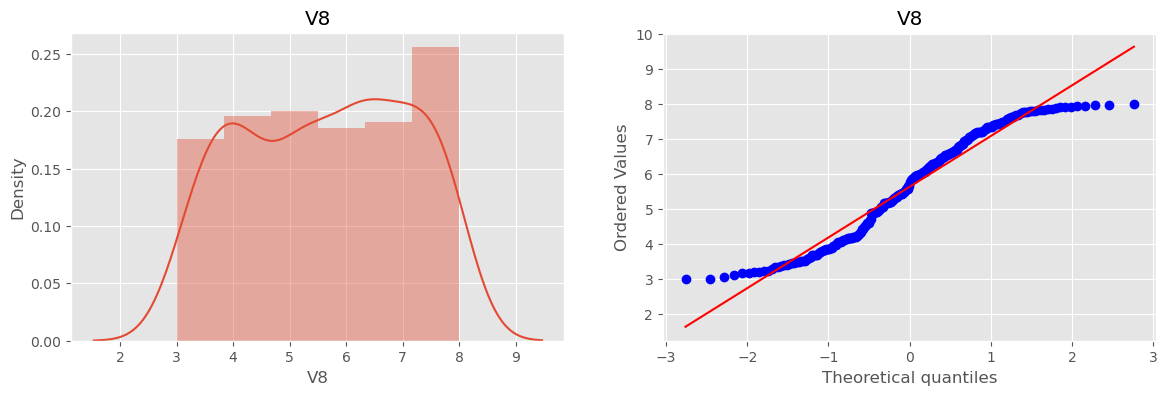

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


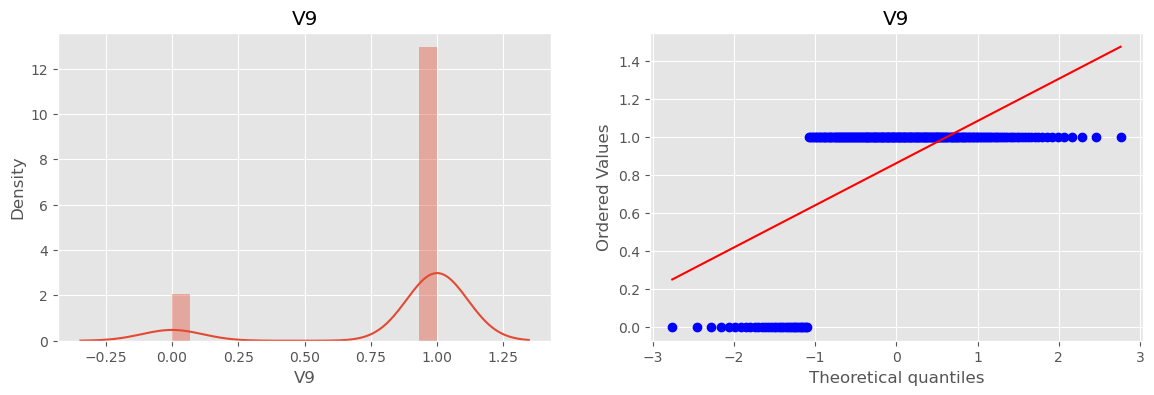

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


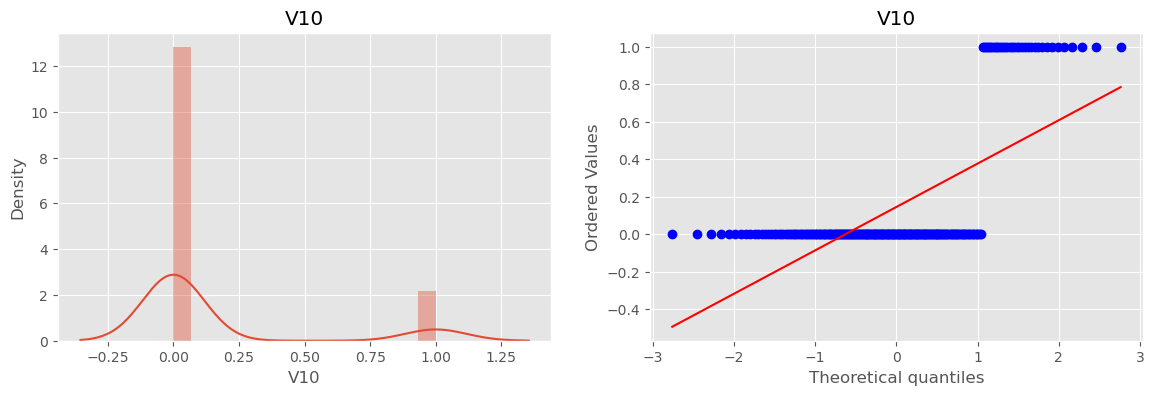

In [46]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    
    plt.title(col)

    plt.show()

In [47]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

cols  box_cox_lambdas
0   V1         0.517748
1   V2         1.218425
2   V3         0.274555
3   V4         1.490793
4   V5         0.307718
5   V6         1.359079
6   V7        -0.013576
7   V8         0.935454
8   V9         0.523669
9  V10        -0.492590

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


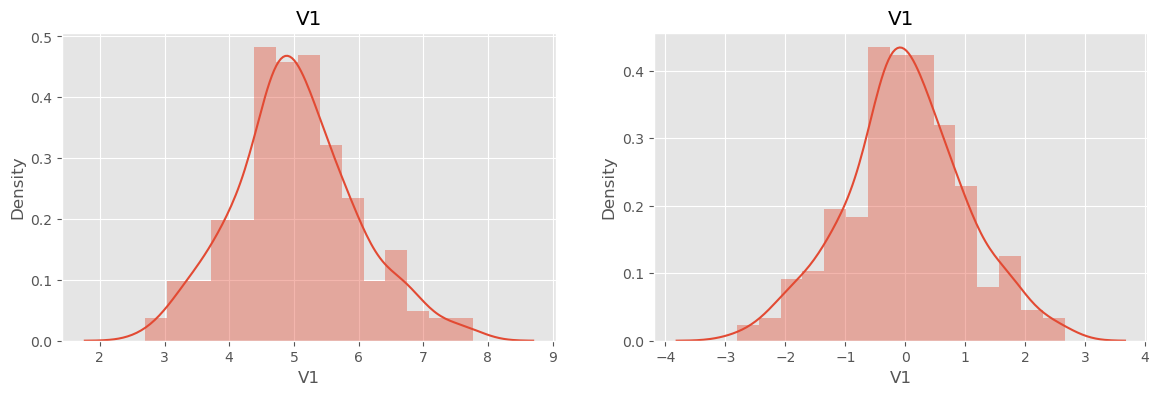

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


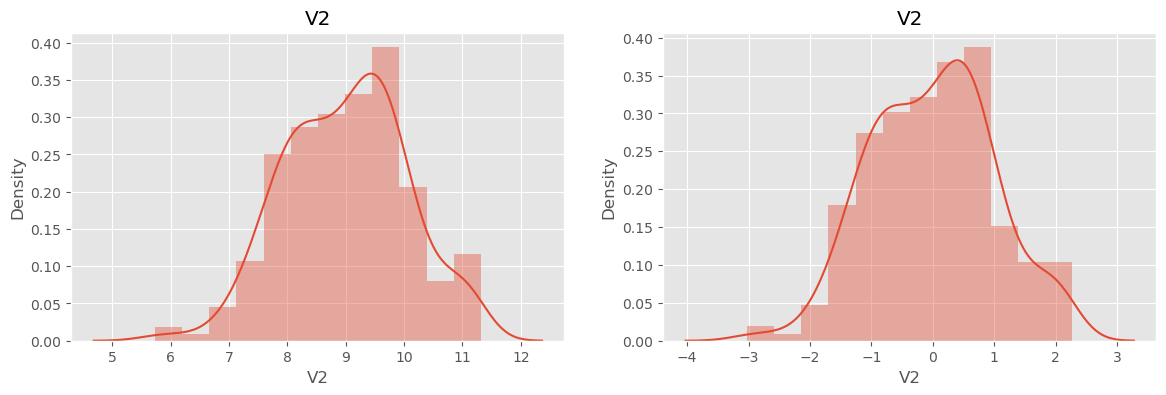

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


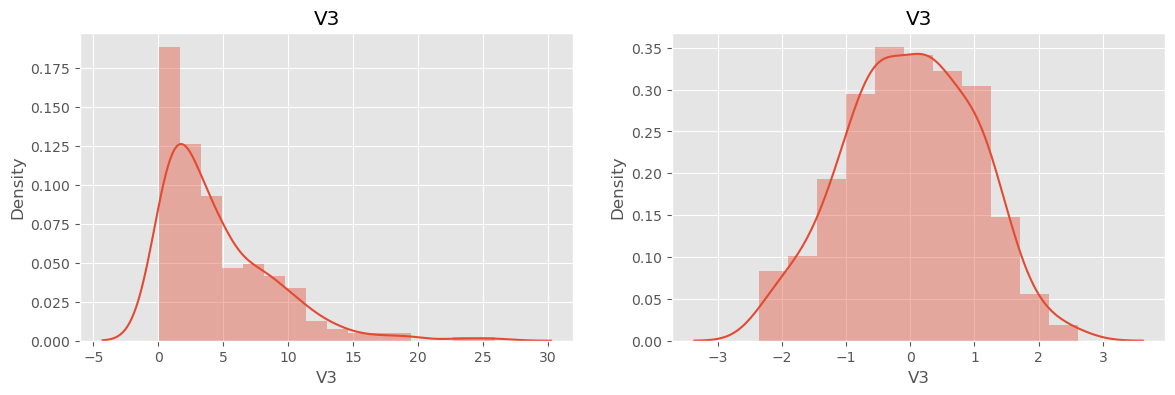

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


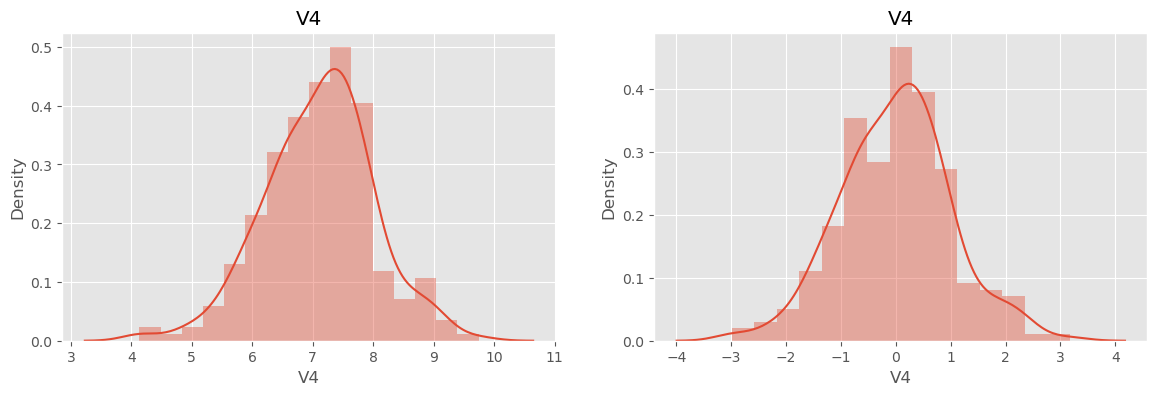

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


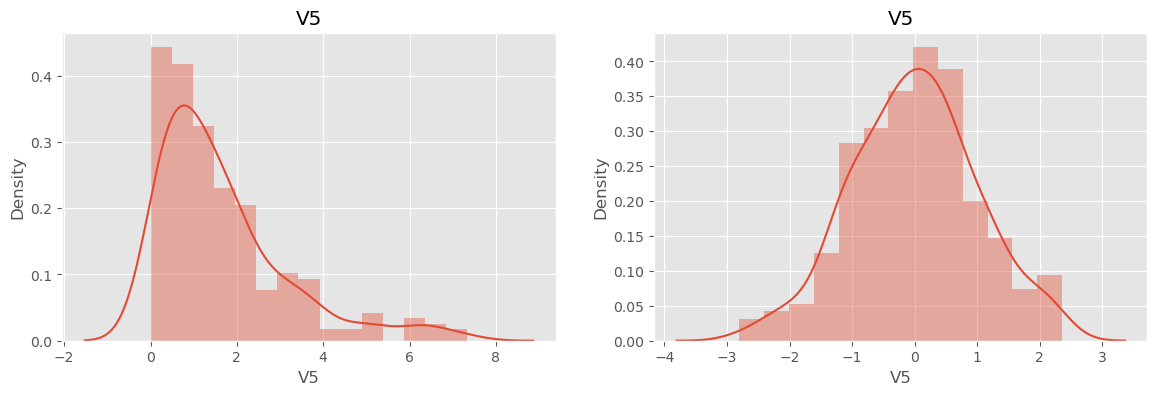

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


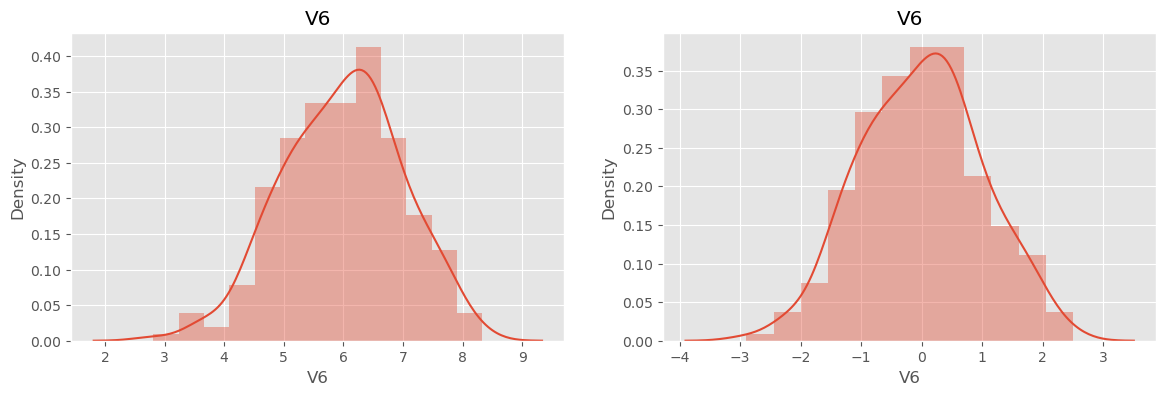

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


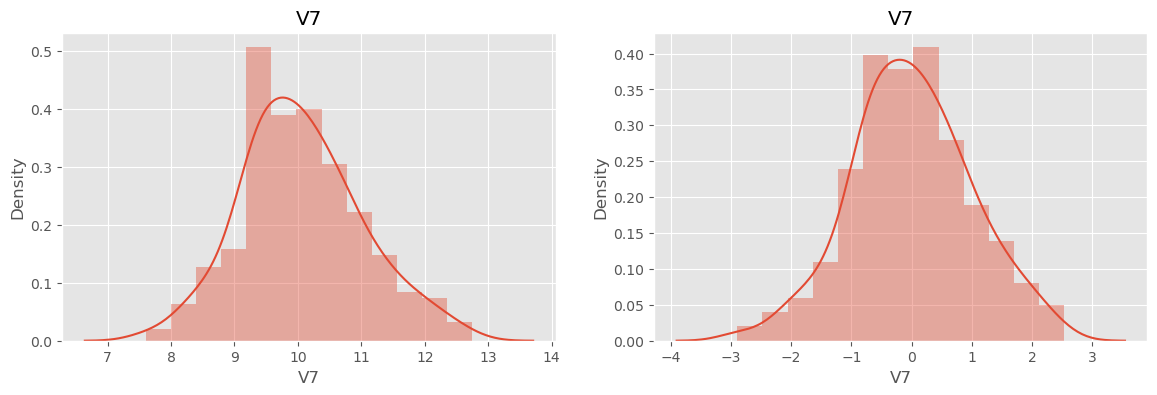

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


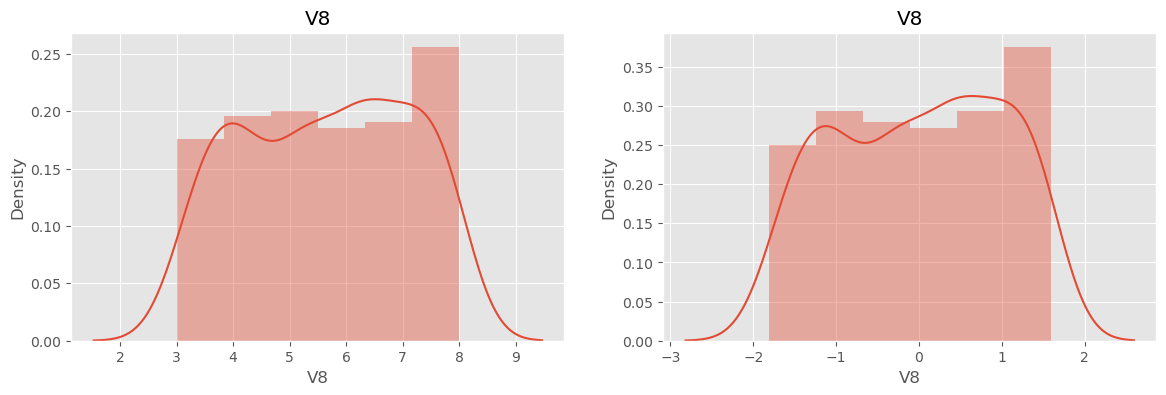

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


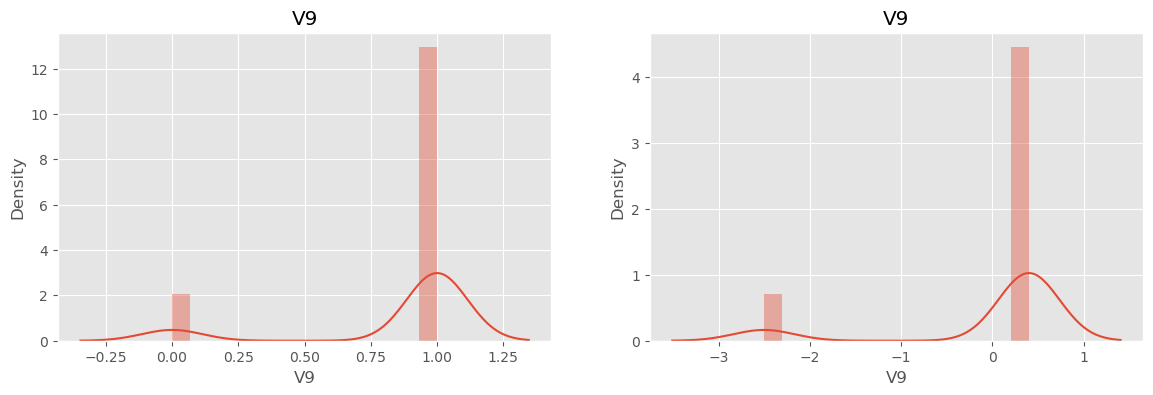

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


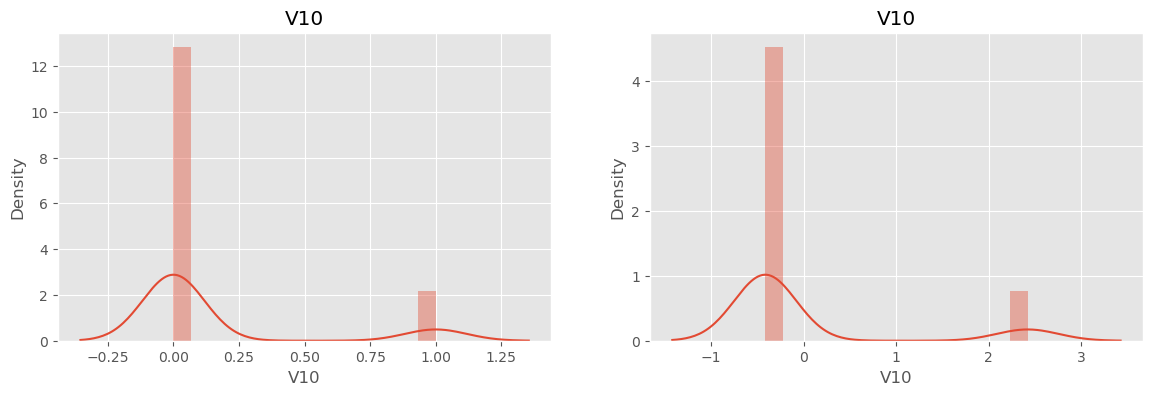

In [48]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

# Selecting best model

In [49]:
df2 = pd.read_csv('C:/Users/gauta/OneDrive/Desktop/Regression_project_data.csv')
del df2['Unnamed: 0']
df2.head()

Y        V1         V2        V3        V4        V5        V6  \
0  3.955299e+07  2.705616   8.010346  4.124158  6.085618  2.720406  6.666423   
1  1.113885e+08  5.221836  10.097714  0.800022  8.442870  0.409000  7.120131   
2  4.091115e+07  4.288222   8.762010  3.751944  5.939178  2.666111  6.113596   
3  4.923284e+07  4.061546   9.595422  4.872827  6.791508  0.049650  6.198104   
4  1.040508e+08  4.788482   8.548239  1.529381  8.023423  2.282913  8.070690   

          V7        V8  V9  V10  
0   7.604752  6.165214   1    0  
1  10.637852  6.953741   1    0  
2   9.573163  4.890891   1    0  
3   9.166444  4.608687   1    0  
4   9.851151  6.101992   1    0

In [50]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

# Best subset selection

To perform best selection, we fit separate models for each possible combination of the n predictors and then select the best subset. That is we fit:

- All models that contains exactly one predictor
- All models that contain 2 predictors at the second step: (nC2)
- Until reaching the end point where all n predictors are included in the model

This results in 2n
 possibilities as this is a power set problem. In our case there are 2^10=1024
 possible combinations
 
 ## Algorithm
 
   - Let M_0 denote the null model which contains no predictors, this model simply predicts the sample mean of each observation
       - For k=1,2,...,n
         - Fit all (nCk) models that contain exactly k predictors
         - Pick the best among these (nk) models, and call it M_k. Here the                best is defined as having the smallest RSS, or an equivalent measure
       - Select the single best model among M_0,M_1,...,M_n using cross                  validated predicton error, Cp, BIC, adjusted R2 or any other method.


## Helper function for fitting linear regression (Sklearn)

In [51]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared
    

## Implementing Best subset selection (using itertools.combinations)

In [52]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = df2.Y
X = df2.drop(columns = 'Y', axis = 1)
k = 10
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 10 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 10 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

C:\Users\gauta\AppData\Local\Temp\ipykernel_22404\1881472394.py:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/10 [00:00<?, ?it/s]

## Finding the best subsets for each number of features

Using the smallest RSS Value, or the largest R_squared value 

In [53]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))


numb_features           RSS  R_squared      features
3               1  3.834547e+16   0.862249         (V4,)
34              2  1.707693e+16   0.938654      (V4, V5)
70              3  1.427903e+16   0.948705  (V1, V4, V5)

numb_features           RSS  R_squared      features
3               1  3.834547e+16   0.862249         (V4,)
34              2  1.707693e+16   0.938654      (V4, V5)
70              3  1.427903e+16   0.948705  (V1, V4, V5)

In [54]:
df_min

numb_features           RSS  R_squared  \
3                 1  3.834547e+16   0.862249   
34                2  1.707693e+16   0.938654   
70                3  1.427903e+16   0.948705   
228               4  1.419845e+16   0.948994   
484               5  1.412968e+16   0.949241   
751               6  1.411917e+16   0.949279   
886               7  1.410951e+16   0.949314   
989               8  1.409982e+16   0.949348   
1019              9  1.409290e+16   0.949373   
1022             10  1.409091e+16   0.949380   

                                       features  
3                                         (V4,)  
34                                     (V4, V5)  
70                                 (V1, V4, V5)  
228                           (V1, V4, V5, V10)  
484                       (V1, V4, V5, V8, V10)  
751                   (V1, V4, V5, V8, V9, V10)  
886               (V1, V2, V4, V5, V6, V8, V10)  
989           (V1, V2, V4, V5, V6, V7, V8, V10)  
1019      (V1, V2, V4, V5, V6, V7, V8, V9, V10)  
1022  (V1, V2, V3, V4, V5, V6, V7, V8, V9, V10)

In [55]:
df_max

numb_features           RSS  R_squared  \
3                 1  3.834547e+16   0.862249   
34                2  1.707693e+16   0.938654   
70                3  1.427903e+16   0.948705   
228               4  1.419845e+16   0.948994   
484               5  1.412968e+16   0.949241   
751               6  1.411917e+16   0.949279   
886               7  1.410951e+16   0.949314   
989               8  1.409982e+16   0.949348   
1019              9  1.409290e+16   0.949373   
1022             10  1.409091e+16   0.949380   

                                       features  
3                                         (V4,)  
34                                     (V4, V5)  
70                                 (V1, V4, V5)  
228                           (V1, V4, V5, V10)  
484                       (V1, V4, V5, V8, V10)  
751                   (V1, V4, V5, V8, V9, V10)  
886               (V1, V2, V4, V5, V6, V8, V10)  
989           (V1, V2, V4, V5, V6, V7, V8, V10)  
1019      (V1, V2, V4, V5, V6, V7, V8, V9, V10)  
1022  (V1, V2, V3, V4, V5, V6, V7, V8, V9, V10)

## Plotting the minimum RSS and Maximum R_square Vs Number of features


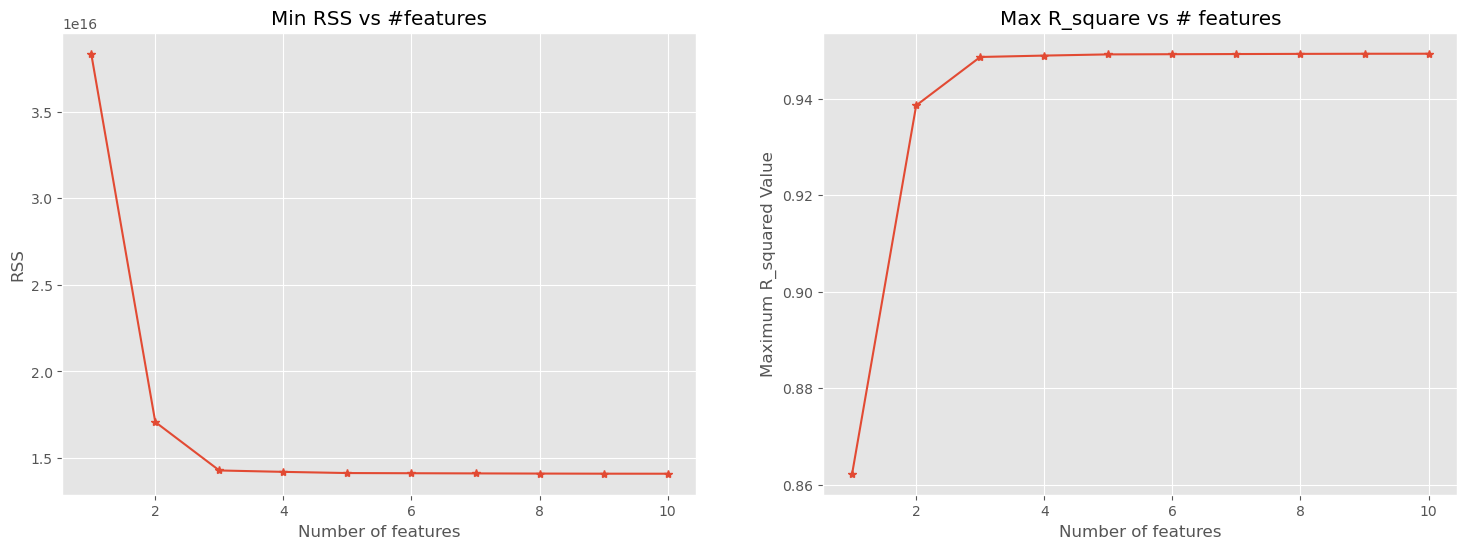

In [56]:
  
# initialize x and y coordinates
fig = plt.figure(figsize = (18,6))
features = df_max['numb_features']
Min_RSS = df_max['RSS']
Max_R_squared = df_max['R_squared']

plt.subplot(1,2,1)
plt.plot(features, Min_RSS, marker="*")
plt.title("Min RSS vs #features")
plt.ylabel("RSS")
plt.xlabel("Number of features")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(features, Max_R_squared, marker="*")
plt.title("Max R_square vs # features")
plt.ylabel("Maximum R_squared Value")
plt.xlabel("Number of features")
plt.grid(True)

plt.show()

## Adding columns to the dataframe with RSS and R squared values of the best subset

In [57]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()


numb_features           RSS  R_squared features       min_RSS  \
0              1  2.737246e+17   0.016682    (V1,)  3.834547e+16   
1              1  2.781174e+17   0.000902    (V2,)  3.834547e+16   
2              1  2.743839e+17   0.014314    (V3,)  3.834547e+16   
3              1  3.834547e+16   0.862249    (V4,)  3.834547e+16   
4              1  2.666196e+17   0.042206    (V5,)  3.834547e+16   

   max_R_squared  
0       0.862249  
1       0.862249  
2       0.862249  
3       0.862249  
4       0.862249

## Plotting the best subset selection process

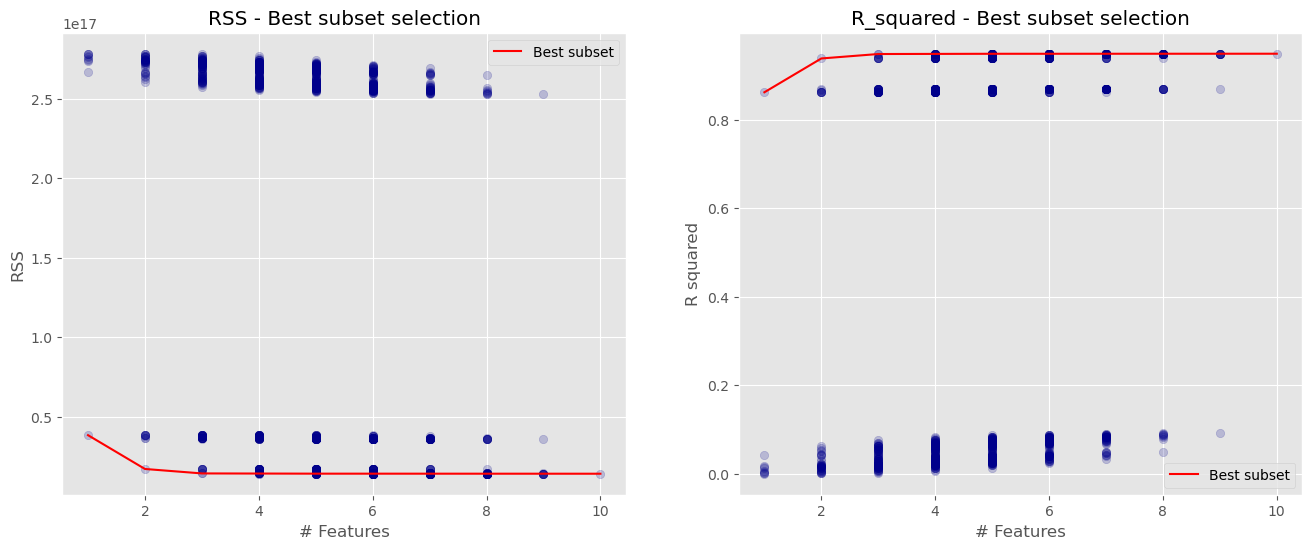

In [58]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

## Forward stepwise selection

For computational reasons, the best subset cannot be applied for any large n
due to the $2^n$ complexity. Forward Stepwise begins with a model containing no predictors, and then adds predictors to the model, one at the time. At each step, the variable that gives the greatest additional improvement to the fit is added to the model.

### Algorithm

Let $M_0$ denote the null model which contains no predictors

 - For $k=1,2,...,n−1$

   - Consider all $n−k$ models that augment the predictors in $M_k$ with one 
     additional predictor
   - Choose the \textit{best} among these $n−k$ models, and call it $M_k+1$
   - Select the single best model among $M_0,M_1,...,M_n$ using cross validated 
     predicton error, $C_p, BIC, adjusted R^2$ or any other method.

In [59]:
#Initialization variables
#Y = df2.Y
##X = df2.drop(columns = 'Balance', axis = 1)
k = 10

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [27]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,11)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['V4'], 38345471133521288),
 (2, ['V4', 'V5'], 17076929672279732),
 (3, ['V4', 'V5', 'V1'], 14279029676255524),
 (4, ['V4', 'V5', 'V1', 'V10'], 14198449815008740),
 (5, ['V4', 'V5', 'V1', 'V10', 'V8'], 14129682186328508),
 (6, ['V4', 'V5', 'V1', 'V10', 'V8', 'V9'], 14119167377711116),
 (7, ['V4', 'V5', 'V1', 'V10', 'V8', 'V9', 'V6'], 14110386286093154),
 (8, ['V4', 'V5', 'V1', 'V10', 'V8', 'V9', 'V6', 'V2'], 14102288584789658),
 (9,
  ['V4', 'V5', 'V1', 'V10', 'V8', 'V9', 'V6', 'V2', 'V7'],
  14092904456330180),
 (10,
  ['V4', 'V5', 'V1', 'V10', 'V8', 'V9', 'V6', 'V2', 'V7', 'V3'],
  14090905418225196)]

## Comparing models: AIC, BIC, Mallows'CP

The training set Mean Squared Error (MSE) is generally an underestimate of the test MSE. This is because when we fit a model to the training data using least squares, we specifically estimate the regression coefficients such that the training RSS is minimized. In particular, the training RSS decreases as we add more features to the model, but the test error may not. Therefore the training RSS and $R^2$ may not be used for selecting the best model unless we adjust for this underestimation.


## Mallow's $Cp$

Mallow's $C_p$ is named after Colin Lingwood Mallows and is defined as:

$C_p=(1/m)*(RSS+2dσ'^2)$

where $σ'^2$ is an estimate of the variance of the error ϵ associated with each response measurement. Typically $σ'^2$ is estimated using the full model containing all predictors.

### Akaike's Information Criteria (AIC)
The AIC criterion is defiend for a large class of models fit by maximum likelihood. In the case of a linear model with Gaussian errors, MLE and least squares are the same thing and the AIC is given by

$AIC=(1/(mσ'^2))*(RSS+2dσ'^2)$

## Bayesian Information Criteria (BIC)
BIC is derived from a Bayesian point of view, and looks similar to the $C_p$
and AIC- it is defined (up to irrelevant constants) as:

$BIC=(1/mσ'^2)(RSS+log(m)dσ'^2)$

Like $C_p$ and AIC, the BIC will tend to take small values for a model with low test error.

## Adjusted R2
Since the $R^2$ always increases as more variables are added, the adjusted $R_2$ accounts for that fact and introduces a penalty. The intuition is that once all the correct variables have been included in the model,additional noise variables will lead to a very small decrase in RSS, but an increase in $k$
 and hence will decrease the adjusted $R_2$. In effect, we pay a price for the inclusion of unnecessary variables in the model.

$R_a^2=1−(RSS/(m−k−1))/(TSS/(m−1))=1−((1−R2)(m−1)/(m−k−1))$

## Theoretical justification
$C_p, AIC, BIC$ all have rigorous theoretical justification that rely on asymptotic arguments, i.e. when the sample size m grows very large, whereas the adjusted $R^2$, although quite intuitive, is not as well motivated in statistical theory.

## Combining forward stepwise results into a new DataFrame


In [60]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

## Computing the C_p, AIC, BIC and R-square adjusted

In [61]:
#Initializing useful variables
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

features           RSS  R_squared  \
1                                        [V4]  3.834547e+16   0.862249   
2                                    [V4, V5]  1.707693e+16   0.938654   
3                                [V4, V5, V1]  1.427903e+16   0.948705   
4                           [V4, V5, V1, V10]  1.419845e+16   0.948994   
5                       [V4, V5, V1, V10, V8]  1.412968e+16   0.949241   
6                   [V4, V5, V1, V10, V8, V9]  1.411917e+16   0.949279   
7               [V4, V5, V1, V10, V8, V9, V6]  1.411039e+16   0.949310   
8           [V4, V5, V1, V10, V8, V9, V6, V2]  1.410229e+16   0.949339   
9       [V4, V5, V1, V10, V8, V9, V6, V2, V7]  1.409290e+16   0.949373   
10  [V4, V5, V1, V10, V8, V9, V6, V2, V7, V3]  1.409091e+16   0.949380   

    numb_features           C_p       AIC       BIC  R_squared_adj  
1               1  1.281444e+14  2.619107  2.631453       0.861787  
2               2  5.757546e+13  1.176768  1.201460       0.938240  
3               3  4.857530e+13  0.992817  1.029855       0.948185  
4               4  4.863288e+13  0.993994  1.043377       0.948302  
5               5  4.872983e+13  0.995975  1.057705       0.948378  
6               6  4.902096e+13  1.001925  1.076001       0.948240  
7               7  4.931787e+13  1.007994  1.094415       0.948095  
8               8  4.961706e+13  1.014109  1.112876       0.947947  
9               9  4.991195e+13  1.020136  1.131250       0.947802  
10             10  5.023147e+13  1.026667  1.150126       0.947629

In [62]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()

0.9483778317624674

## Plotting the computed values as a function of number of features¶

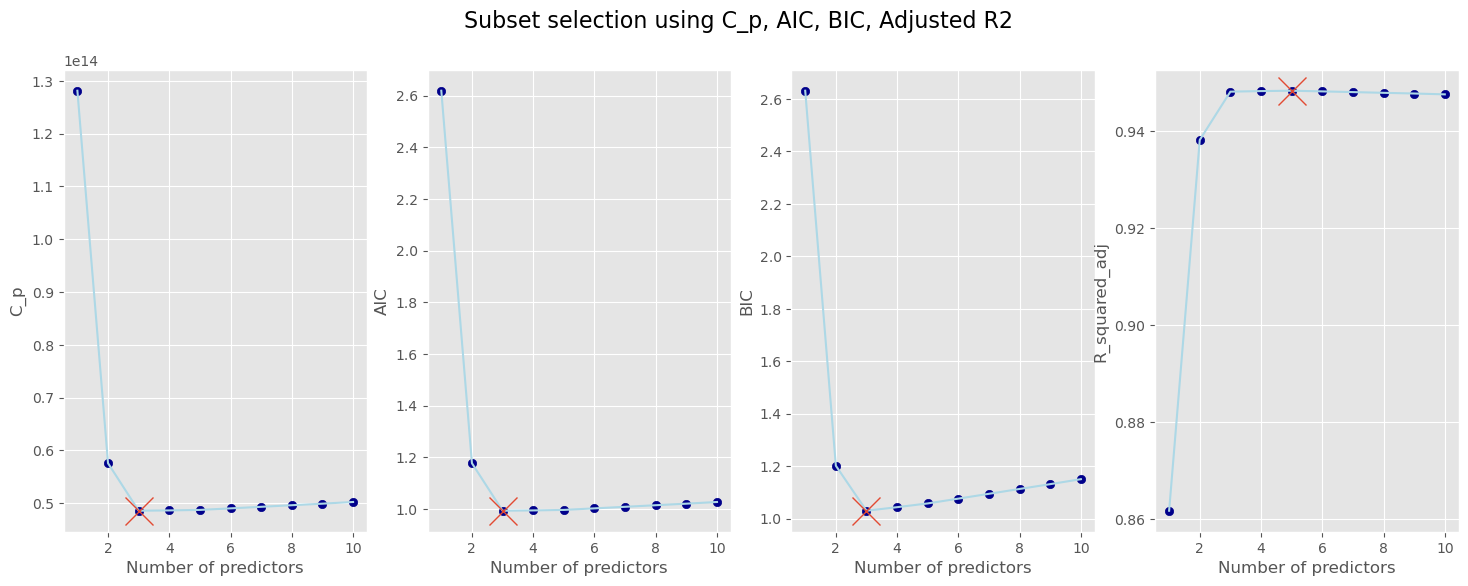

In [63]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()


## Model 1: Based on Adjusted R^2

### features = [V4, V5, V1, V10, V8]


In [338]:
X_train.head()

const        V1         V2        V3        V4        V5        V6  \
232    1.0  4.711091  10.112907  2.187593  7.688166  1.653905  6.608416   
59     1.0  5.256652   9.674076  1.220403  6.869028  0.953635  5.664861   
6      1.0  3.675749   7.640511  1.190308  7.759436  5.106688  6.262776   
185    1.0  4.163253   9.153891  0.768996  6.000877  1.935401  5.734916   
173    1.0  5.630239   7.772458  2.704963  6.967032  0.080228  6.385144   

            V7        V8  V9  V10  
232  10.062451  4.921883   1    0  
59   10.450515  5.172716   1    0  
6     8.463551  6.540107   1    0  
185   9.087214  7.201239   1    0  
173  10.881750  7.942917   1    0

In [65]:
## preparing the data
#X_train, X_test, y_train, y_test

In [339]:
x_train = X_train[['V4', 'V5', 'V1', 'V10', 'V8']]
x_test  = X_test[['V4', 'V5', 'V1', 'V10', 'V8']]
x_test.head()
#y_train.head()


V4        V5        V1  V10        V8
203  6.393998  6.708380  4.492399    0  7.927108
266  8.794487  0.828996  6.851933    0  6.578809
152  8.285431  0.692489  5.682339    0  3.050583
9    7.896944  0.415595  4.852295    0  6.711999
233  6.702799  4.222613  6.358627    0  7.112359

In [340]:
x_train.head()

V4        V5        V1  V10        V8
232  7.688166  1.653905  4.711091    0  4.921883
59   6.869028  0.953635  5.256652    0  5.172716
6    7.759436  5.106688  3.675749    0  6.540107
185  6.000877  1.935401  4.163253    0  7.201239
173  6.967032  0.080228  5.630239    0  7.942917

## Model Building

In [341]:

import statsmodels.api as data_stat_model  
x_train = data_stat_model.add_constant(x_train) 
data_OLS_result_M1 = data_stat_model.OLS(y_train, x_train).fit() 
data_OLS_result_M1.params.sort_values(ascending=False) 
print(data_OLS_result_M1.summary()) 
 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     877.7
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          2.29e-149
Time:                        20:09:10   Log-Likelihood:                -4112.7
No. Observations:                 240   AIC:                             8237.
Df Residuals:                     234   BIC:                             8258.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.719e+08   4.53e+06    -37.978      0.0

##  Checking the Assumptions of the error terms

In linear regression we assume that the error term follows normal distribution. So we have to check this assumption before we can use the model for making predictions. We check this by looking at the histogram of the error term visually, making sure that the error terms are normally distributed around zero and that the left and right side are broadly similar.

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


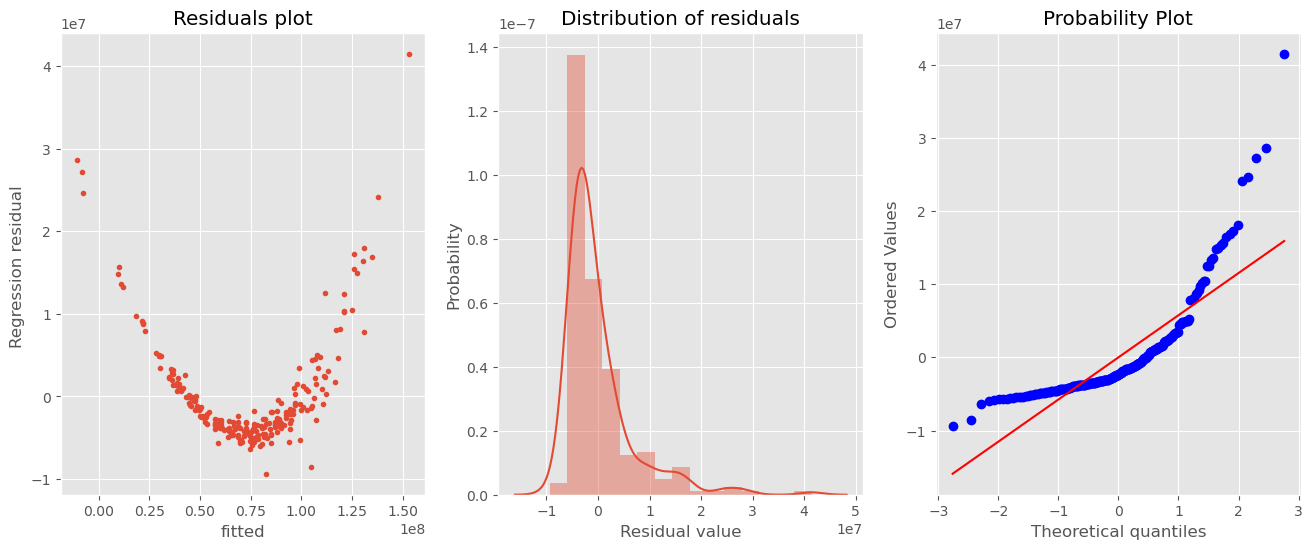

In [342]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(data_OLS_result_M1.fittedvalues,data_OLS_result_M1.resid, marker = '.', linestyle = 'none')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(data_OLS_result_M1.resid,ax = ax2, bins = 15)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(data_OLS_result_M1.resid, dist = "norm", plot = plt)
plt.show()


## Making predictions

In [343]:
x_test = data_stat_model.add_constant(x_test)


In [344]:
x_test.head()

const        V4        V5        V1  V10        V8
203    1.0  6.393998  6.708380  4.492399    0  7.927108
266    1.0  8.794487  0.828996  6.851933    0  6.578809
152    1.0  8.285431  0.692489  5.682339    0  3.050583
9      1.0  7.896944  0.415595  4.852295    0  6.711999
233    1.0  6.702799  4.222613  6.358627    0  7.112359

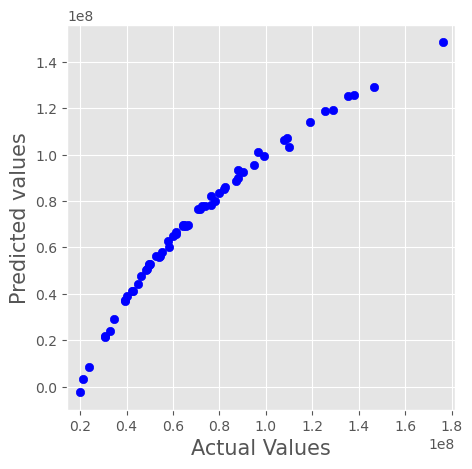

In [345]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, data_OLS_result_M1.predict(x_test), c='blue')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.grid(True)
plt.show()

# Now based on the plot of the residual: Transformation in the response varaiable: Y=$log(Y )$and $V4=sqrt(V4)$

In [346]:
## Transforming the response variable
y_train_transfomed = np.log(y_train)
y_test_transfomed  = np.log(y_test)

In [347]:
y_test_transfomed.head()

203    18.072705
266    18.742985
152    18.495531
9      18.285057
233    18.149881
Name: Y, dtype: float64

In [348]:
x_train.head()

const        V4        V5        V1  V10        V8
232    1.0  7.688166  1.653905  4.711091    0  4.921883
59     1.0  6.869028  0.953635  5.256652    0  5.172716
6      1.0  7.759436  5.106688  3.675749    0  6.540107
185    1.0  6.000877  1.935401  4.163253    0  7.201239
173    1.0  6.967032  0.080228  5.630239    0  7.942917

In [349]:
#x_train['V4']=(x_train['V4'])**(1/2)
x_train.head()


const        V4        V5        V1  V10        V8
232    1.0  2.772754  1.653905  4.711091    0  4.921883
59     1.0  2.620883  0.953635  5.256652    0  5.172716
6      1.0  2.785576  5.106688  3.675749    0  6.540107
185    1.0  2.449669  1.935401  4.163253    0  7.201239
173    1.0  2.639514  0.080228  5.630239    0  7.942917

In [350]:
#x_test['V4']=(x_test['V4'])**(1/2)
x_test.head()

const        V4        V5        V1  V10        V8
203    1.0  2.528636  6.708380  4.492399    0  7.927108
266    1.0  2.965550  0.828996  6.851933    0  6.578809
152    1.0  2.878443  0.692489  5.682339    0  3.050583
9      1.0  2.810150  0.415595  4.852295    0  6.711999
233    1.0  2.588976  4.222613  6.358627    0  7.112359

In [351]:
## fitting the transformed model
import statsmodels.api as data_stat_model   
data_OLS_result_M2 = data_stat_model.OLS(y_train_transfomed, x_train).fit() 
data_OLS_result_M2.params.sort_values(ascending=False) 
print(data_OLS_result_M2.summary()) 
 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.442e+04
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          4.46e-289
Time:                        20:10:38   Log-Likelihood:                 552.28
No. Observations:                 240   AIC:                            -1093.
Df Residuals:                     234   BIC:                            -1072.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2681      0.027    421.431      0.0

## Checking the assumption of residuals

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


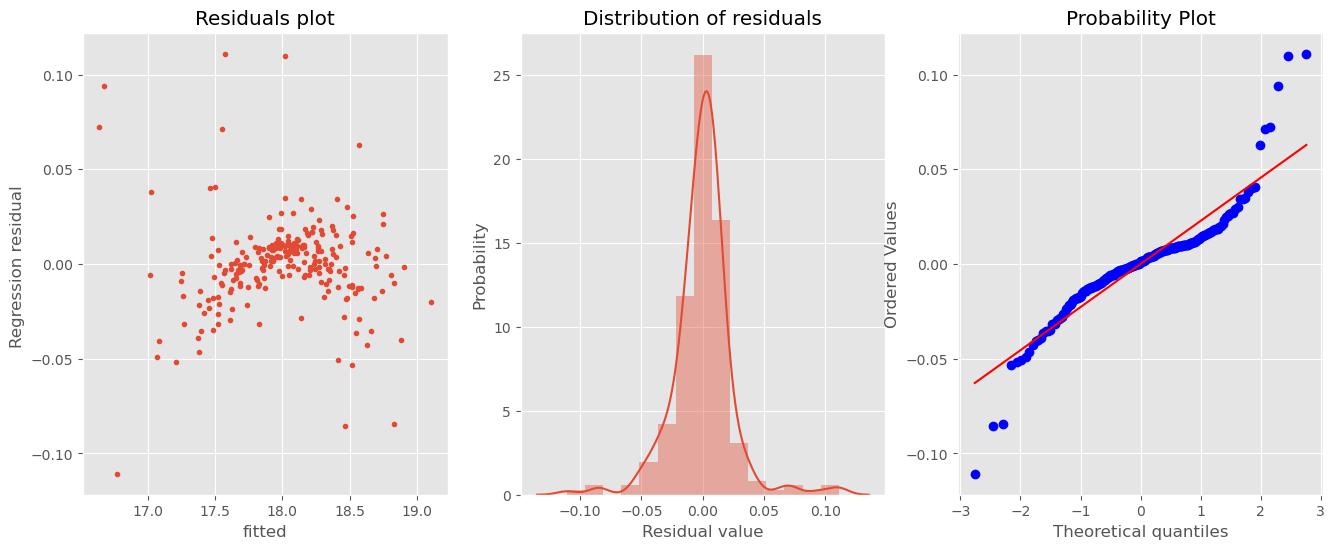

In [352]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(data_OLS_result_M2.fittedvalues,data_OLS_result_M2.resid, marker = '.', linestyle = 'none')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(data_OLS_result_M2.resid,ax = ax2, bins = 15)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(data_OLS_result_M2.resid, dist = "norm", plot = plt)
plt.show()

In [353]:
y_test_transfomed.head()

203    18.072705
266    18.742985
152    18.495531
9      18.285057
233    18.149881
Name: Y, dtype: float64

In [354]:
predicted = data_OLS_result_M2.predict(x_test)
predicted.head()

203    18.064504
266    18.763665
152    18.487062
9      18.268168
233    18.101040
dtype: float64

## Making prediction



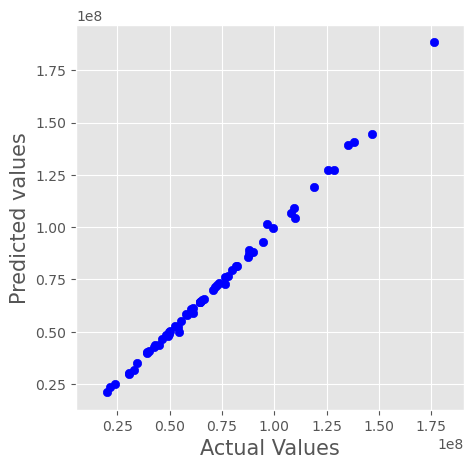

In [355]:
plt.figure(figsize=(5,5))
plt.scatter(np.exp(y_test_transfomed), np.exp(predicted), c='blue')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.grid(True)
plt.show()

## Making Box-cox transformation

In [563]:
x_train = X_train[['V4', 'V5', 'V1', 'V10', 'V8']]
x_test  = X_test[['V4', 'V5', 'V1', 'V10', 'V8']]
x_test.head()
#y_train.head()


V4        V5        V1  V10        V8
203  6.393998  6.708380  4.492399    0  7.927108
266  8.794487  0.828996  6.851933    0  6.578809
152  8.285431  0.692489  5.682339    0  3.050583
9    7.896944  0.415595  4.852295    0  6.711999
233  6.702799  4.222613  6.358627    0  7.112359

In [564]:
x_train.head()

V4        V5        V1  V10        V8
232  7.688166  1.653905  4.711091    0  4.921883
59   6.869028  0.953635  5.256652    0  5.172716
6    7.759436  5.106688  3.675749    0  6.540107
185  6.000877  1.935401  4.163253    0  7.201239
173  6.967032  0.080228  5.630239    0  7.942917

In [565]:
y_train.head()


232    8.645148e+07
59     5.789640e+07
6      1.045229e+08
185    3.916703e+07
173    5.690052e+07
Name: Y, dtype: float64

In [566]:
#y_train.head()
y_test.head()

203    7.061159e+07
266    1.380304e+08
152    1.077723e+08
9      8.731712e+07
233    7.627696e+07
Name: Y, dtype: float64

In [567]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

x_train_transformed_box = pt.fit_transform(x_train+0.000001)
x_test_transformed_box = pt.transform(x_test+0.000001)
#y_train_transformed_box = pt.fit_transform(y_train+0.000001)
#y_test_transformed_box = pt.transform(y_test+0.000001)

pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})

cols  box_cox_lambdas
0   V4         1.490793
1   V5         0.307718
2   V1         0.517748
3  V10        -0.492590
4   V8         0.935454

In [568]:
x_train['V4']=(x_train['V4'])**(1.490793)
x_train['V5']=(x_train['V5'])**(0.307718)
x_train['V1']=(x_train['V1'])**(0.517748)
x_train['V10']=(x_train['V10'])**(1)
x_train['V8']=(x_train['V8'])**(0.935454)

C:\Users\gauta\AppData\Local\Temp\ipykernel_22404\2574966639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['V4']=(x_train['V4'])**(1.490793)
C:\Users\gauta\AppData\Local\Temp\ipykernel_22404\2574966639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['V5']=(x_train['V5'])**(0.307718)
C:\Users\gauta\AppData\Local\Temp\ipykernel_22404\2574966639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [569]:
x_train = data_stat_model.add_constant(x_train) 
x_train.head()

const         V4        V5        V1  V10        V8
232    1.0  20.920804  1.167454  2.231040    0  4.440757
59     1.0  17.686327  0.985498  2.361271    0  4.652120
6      1.0  21.210582  1.651609  1.962035    0  5.793514
185    1.0  14.459627  1.225306  2.092715    0  6.339646
173    1.0  18.063827  0.460088  2.446717    0  6.948482

In [570]:
x_test['V4']=(x_test['V4'])**(1.490793)
x_test['V5']=(x_test['V5'])**(0.307718)
x_test['V1']=(x_test['V1'])**(0.517748)
x_test['V10']=(x_test['V10'])**(1)
x_test['V8']=(x_test['V8'])**(0.935454)

C:\Users\gauta\AppData\Local\Temp\ipykernel_22404\2882117823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['V4']=(x_test['V4'])**(1.490793)
C:\Users\gauta\AppData\Local\Temp\ipykernel_22404\2882117823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['V5']=(x_test['V5'])**(0.307718)
C:\Users\gauta\AppData\Local\Temp\ipykernel_22404\2882117823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [571]:
x_test = data_stat_model.add_constant(x_test) 
x_test.head()

const         V4        V5        V1  V10        V8
203    1.0  15.894249  1.796243  2.176804    0  6.935544
266    1.0  25.563623  0.943924  2.708573    0  5.825580
152    1.0  23.389329  0.893084  2.458414    0  2.838690
9      1.0  21.773372  0.763234  2.265415    0  5.935836
233    1.0  17.052064  1.557767  2.605792    0  6.266421

In [572]:
y_train_transformed_box, fitted_lambda1 = stats.boxcox(y_train)
fitted_lambda1
##
#Y_test_transformed_box, fitted_lambda2 = stats.boxcox(y_test)
#Y_test_transformed_box=pd.DataFrame(Y_test_transformed_box)
#Y_test_transformed_box.columns=['Y']
#Y_test_transformed_box.head()

0.3076990824537575

In [573]:
y_train_trans_box=((y_train)**(0.3076990824537575)-1)/0.3076990824537575

In [574]:
y_test_trans_box=((y_test)**(0.3076990824537575)-1)/0.3076990824537575

In [575]:
y_test_trans_box.head()

203     841.962242
266    1035.561165
152     959.401067
9       899.033111
233     862.273848
Name: Y, dtype: float64

In [576]:
y_train_trans_box.head()

232    896.271260
59     791.873528
6      950.375556
185    701.781582
173    787.639832
Name: Y, dtype: float64

In [246]:
y_test_transformed_box, fitted_lambda2 = stats.boxcox(y_test)

In [247]:
print(f"Lambda value used for Transformation: {fitted_lambda2}")

Lambda value used for Transformation: 0.20167089415186384


In [250]:
y_train_transformed_box.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

## Model Building

In [372]:
## fitting the transformed model
import statsmodels.api as data_stat_model  
#x_train = data_stat_model.add_constant(x_train) 
data_OLS_result_M3 = data_stat_model.OLS(y_train_trans_box, x_train).fit() 
data_OLS_result_M3.params.sort_values(ascending=False) 
print(data_OLS_result_M3.summary()) 
 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3418.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.77e-216
Time:                        20:13:39   Log-Likelihood:                -946.57
No. Observations:                 240   AIC:                             1905.
Df Residuals:                     234   BIC:                             1926.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.2493     10.466      7.572      0.0

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


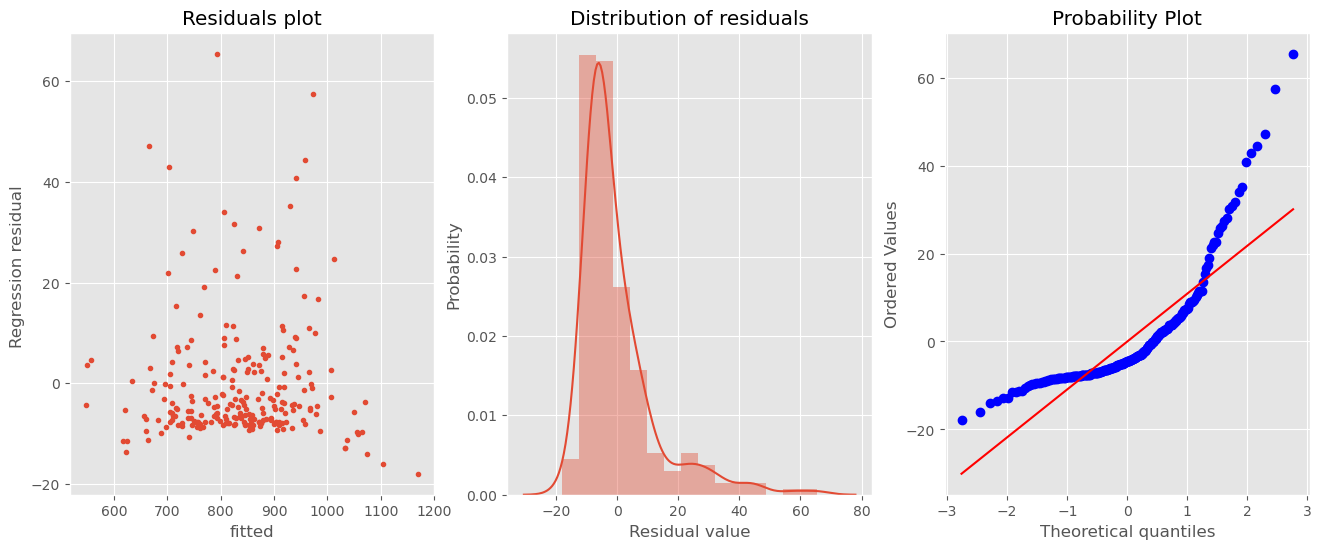

In [373]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(data_OLS_result_M3.fittedvalues,data_OLS_result_M3.resid, marker = '.', linestyle = 'none')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(data_OLS_result_M3.resid,ax = ax2, bins = 15)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(data_OLS_result_M3.resid, dist = "norm", plot = plt)
plt.show()

In [374]:
x_test.head()

const         V4        V5        V1  V10        V8
203    1.0  15.894249  1.796243  2.176804    0  6.935544
266    1.0  25.563623  0.943924  2.708573    0  5.825580
152    1.0  23.389329  0.893084  2.458414    0  2.838690
9      1.0  21.773372  0.763234  2.265415    0  5.935836
233    1.0  17.052064  1.557767  2.605792    0  6.266421

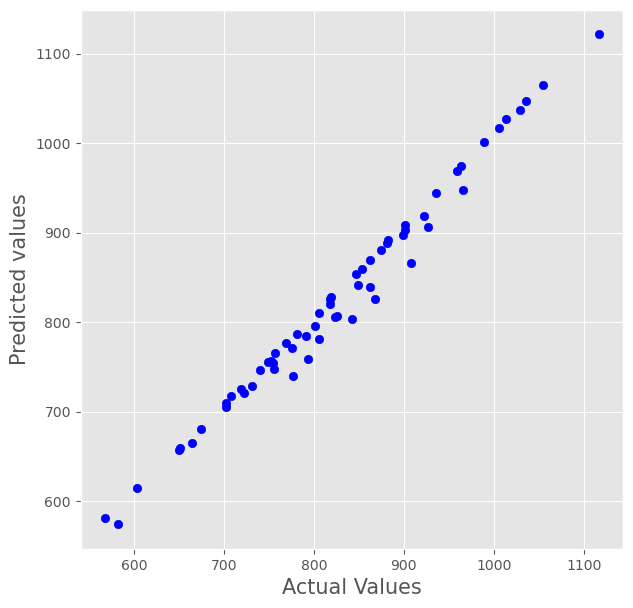

In [375]:
plt.figure(figsize=(7,7))
plt.scatter(y_test_trans_box, data_OLS_result_M3.predict(x_test), c='blue')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.grid(True)
plt.show()


## Analysis for Model selsected Based on AIC,BIC, And Mallos Cp

## Regressors = [V4, V5, V1] 
## Response = Y

In [378]:
x_train_m2= X_train[['V4', 'V5', 'V1']]
x_train_m2 = data_stat_model.add_constant(x_train_m2) 
x_test_m2  = X_test[['V4', 'V5', 'V1']]
x_test_m2 = data_stat_model.add_constant(x_test_m2)
x_train_m2.head()

const        V4        V5        V1
232    1.0  7.688166  1.653905  4.711091
59     1.0  6.869028  0.953635  5.256652
6      1.0  7.759436  5.106688  3.675749
185    1.0  6.000877  1.935401  4.163253
173    1.0  6.967032  0.080228  5.630239

In [379]:
y_train_m2= y_train
y_test_m2= y_test
y_train_m2.head()
#y_test_m2.head()

232    8.645148e+07
59     5.789640e+07
6      1.045229e+08
185    3.916703e+07
173    5.690052e+07
Name: Y, dtype: float64

## Model Building

In [380]:
## fitting the transformed model
import statsmodels.api as data_stat_model  
#x_train = data_stat_model.add_constant(x_train) 
data_OLS_result_M4 = data_stat_model.OLS(y_train_m2, x_train_m2).fit() 
data_OLS_result_M4.params.sort_values(ascending=False) 
print(data_OLS_result_M4.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1455.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          7.29e-152
Time:                        20:15:22   Log-Likelihood:                -4114.3
No. Observations:                 240   AIC:                             8237.
Df Residuals:                     236   BIC:                             8250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.734e+08   4.24e+06    -40.914      0.0

## Checking for assumption of errors

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


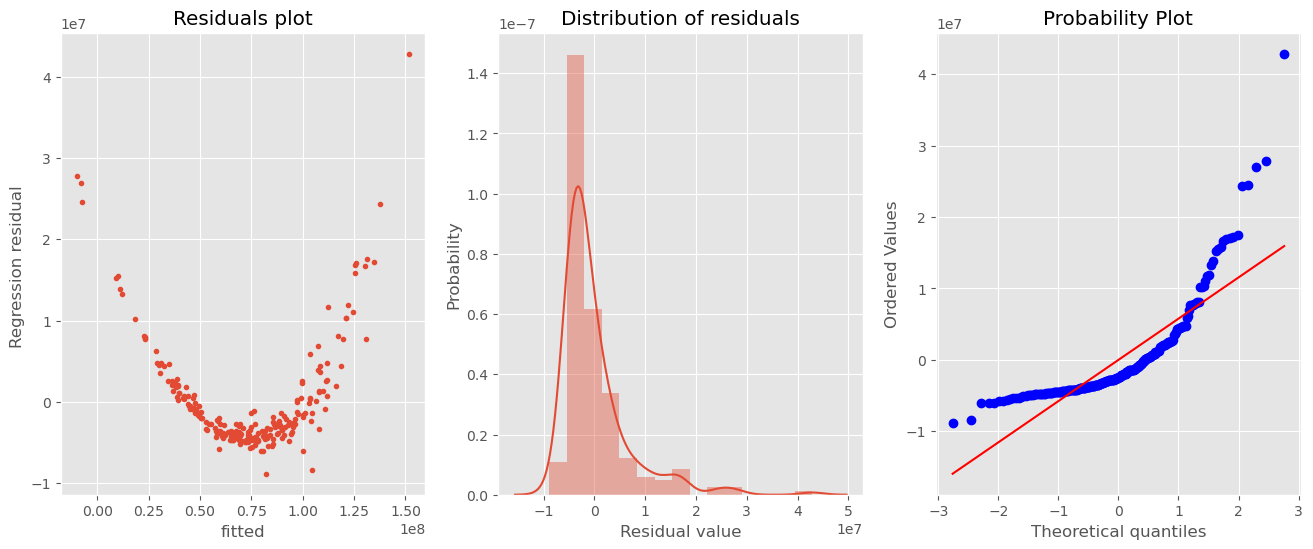

In [381]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(data_OLS_result_M4.fittedvalues,data_OLS_result_M4.resid, marker = '.', linestyle = 'none')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(data_OLS_result_M4.resid,ax = ax2, bins = 15)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(data_OLS_result_M4.resid, dist = "norm", plot = plt)
plt.show()

In [382]:
x_test_m2.head()

const        V4        V5        V1
203    1.0  6.393998  6.708380  4.492399
266    1.0  8.794487  0.828996  6.851933
152    1.0  8.285431  0.692489  5.682339
9      1.0  7.896944  0.415595  4.852295
233    1.0  6.702799  4.222613  6.358627

## Making prediction

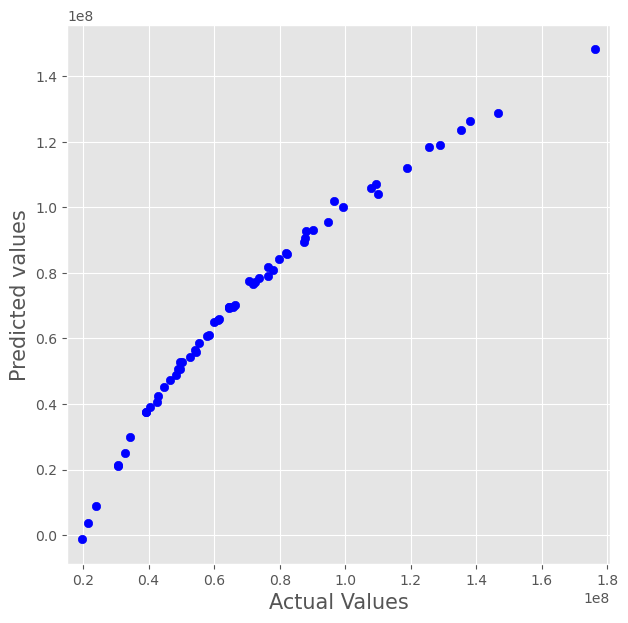

In [383]:
plt.figure(figsize=(7,7))
plt.scatter(y_test_m2, data_OLS_result_M4.predict(x_test_m2), c='blue')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.grid(True)
plt.show()


## Applying Transformation 

In [384]:
## On X train
x_train_m2['V4']=(x_train_m2['V4'])**(1.490793)
x_train_m2['V5']=(x_train_m2['V5'])**(0.307718)
x_train_m2['V1']=(x_train_m2['V1'])**(0.517748)


In [385]:
x_train_m2.head()

const         V4        V5        V1
232    1.0  20.920804  1.167454  2.231040
59     1.0  17.686327  0.985498  2.361271
6      1.0  21.210582  1.651609  1.962035
185    1.0  14.459627  1.225306  2.092715
173    1.0  18.063827  0.460088  2.446717

In [386]:
## On X test
x_test_m2['V4']=(x_test_m2['V4'])**(1.490793)
x_test_m2['V5']=(x_test_m2['V5'])**(0.307718)
x_test_m2['V1']=(x_test_m2['V1'])**(0.517748)


In [387]:
x_test_m2.head()

const         V4        V5        V1
203    1.0  15.894249  1.796243  2.176804
266    1.0  25.563623  0.943924  2.708573
152    1.0  23.389329  0.893084  2.458414
9      1.0  21.773372  0.763234  2.265415
233    1.0  17.052064  1.557767  2.605792

In [388]:
## On Y Train
y_train_trans_m2=((y_train_m2)**(0.3076990824537575)-1)/0.3076990824537575
y_test_trans_m2=((y_test_m2)**(0.3076990824537575)-1)/0.3076990824537575

In [389]:
y_train_trans_m2.head()

232    896.271260
59     791.873528
6      950.375556
185    701.781582
173    787.639832
Name: Y, dtype: float64

In [390]:
y_test_trans_m2.head()

203     841.962242
266    1035.561165
152     959.401067
9       899.033111
233     862.273848
Name: Y, dtype: float64

## Model Building

In [391]:
## fitting the transformed model
import statsmodels.api as data_stat_model  
#x_train = data_stat_model.add_constant(x_train) 
data_OLS_result_M5 = data_stat_model.OLS(y_train_trans_m2, x_train_m2).fit() 
data_OLS_result_M5.params.sort_values(ascending=False) 
print(data_OLS_result_M5.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     5630.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          3.34e-219
Time:                        20:16:14   Log-Likelihood:                -949.00
No. Observations:                 240   AIC:                             1906.
Df Residuals:                     236   BIC:                             1920.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.6850     10.094      7.597      0.0

## Checking for model assumptions

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


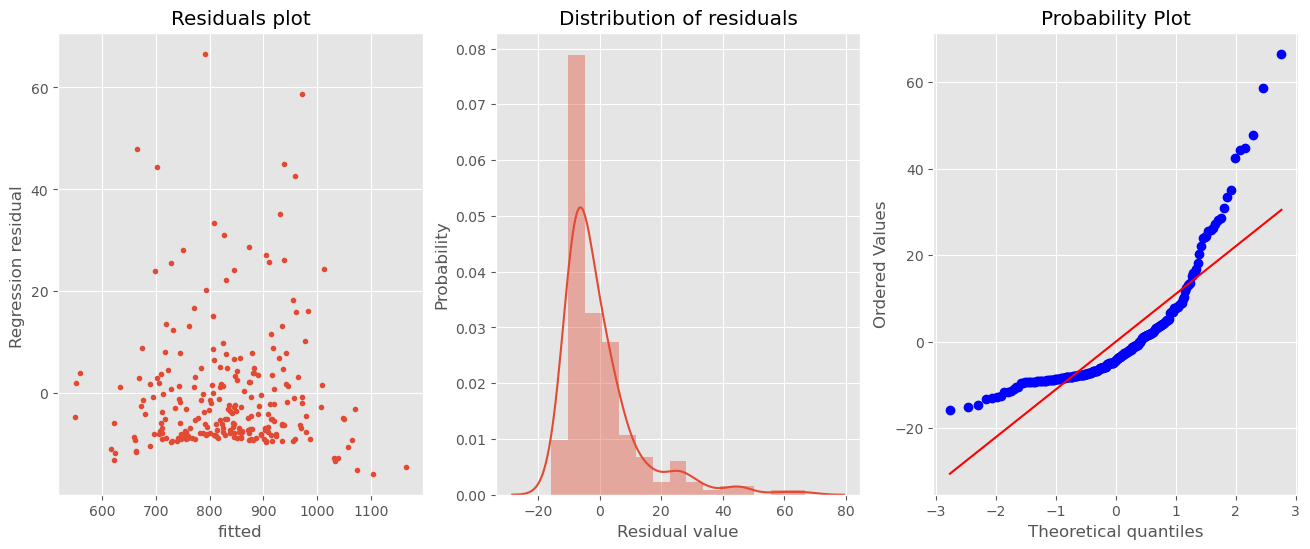

In [392]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(data_OLS_result_M5.fittedvalues,data_OLS_result_M5.resid, marker = '.', linestyle = 'none')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(data_OLS_result_M5.resid,ax = ax2, bins = 15)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(data_OLS_result_M5.resid, dist = "norm", plot = plt)
plt.show()

## Making predictions

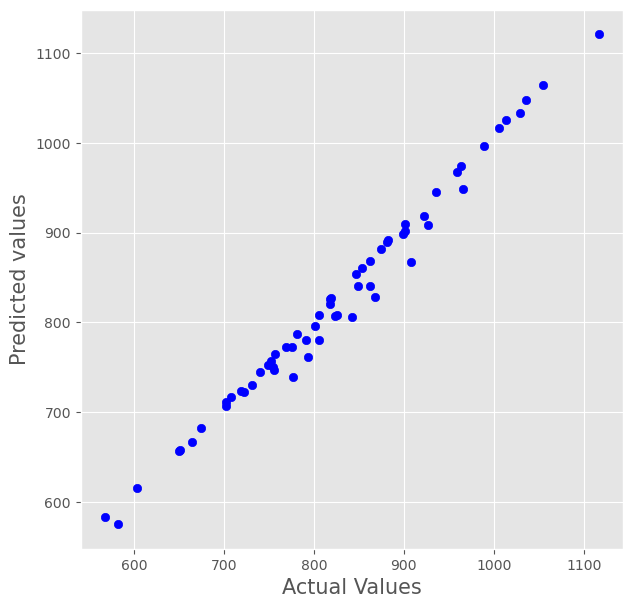

In [393]:
plt.figure(figsize=(7,7))
plt.scatter(y_test_trans_m2, data_OLS_result_M5.predict(x_test_m2), c='blue')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.grid(True)
plt.show()

## TESTING FOR INFLUENTIAL OBSERVATIONS for MODEL based on Adjusted R^2


In [499]:
x_train_i = X_train[['V4', 'V5', 'V1', 'V10', 'V8']]
x_test_i  = X_test[['V4', 'V5', 'V1', 'V10', 'V8']]
#x_test_i.head()
x_train_i.head()

V4        V5        V1  V10        V8
232  7.688166  1.653905  4.711091    0  4.921883
59   6.869028  0.953635  5.256652    0  5.172716
6    7.759436  5.106688  3.675749    0  6.540107
185  6.000877  1.935401  4.163253    0  7.201239
173  6.967032  0.080228  5.630239    0  7.942917

In [500]:
x_test_i.head()

V4        V5        V1  V10        V8
203  6.393998  6.708380  4.492399    0  7.927108
266  8.794487  0.828996  6.851933    0  6.578809
152  8.285431  0.692489  5.682339    0  3.050583
9    7.896944  0.415595  4.852295    0  6.711999
233  6.702799  4.222613  6.358627    0  7.112359

In [501]:
y_train.head()

232    8.645148e+07
59     5.789640e+07
6      1.045229e+08
185    3.916703e+07
173    5.690052e+07
Name: Y, dtype: float64

In [502]:
y_test.head()

203    7.061159e+07
266    1.380304e+08
152    1.077723e+08
9      8.731712e+07
233    7.627696e+07
Name: Y, dtype: float64

In [503]:
import statsmodels.api as data_stat_model  
x_train_i = data_stat_model.add_constant(x_train_i) 
data_OLS_result_M1_i = data_stat_model.OLS(y_train, x_train_i).fit() 
data_OLS_result_M1_i.params.sort_values(ascending=False) 
print(data_OLS_result_M1_i.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     877.7
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          2.29e-149
Time:                        23:41:58   Log-Likelihood:                -4112.7
No. Observations:                 240   AIC:                             8237.
Df Residuals:                     234   BIC:                             8258.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.719e+08   4.53e+06    -37.978      0.0

In [504]:
SSE =  np.sum(data_OLS_result_M1_i.resid**2)
SSE

1.0767078661189584e+16

In [505]:
ei = data_OLS_result_M1_i.resid
ei

232   -3.054031e+06
59    -4.032741e+06
6     -2.862927e+06
185    2.830208e+06
173   -3.431940e+06
           ...     
188   -4.257179e+06
71    -5.474671e+06
106   -4.551456e+06
270   -7.934184e+05
102   -1.467773e+06
Length: 240, dtype: float64

###  Identifyiug Outlying Y Observatiolls-Studentized Deleted Residuals 
    

In [506]:
## HAT MATRIX Summary
influence = data_OLS_result_M1_i.get_influence()
pd.Series(influence.hat_matrix_diag).describe()

count    240.000000
mean       0.025000
std        0.014740
min        0.005499
25%        0.013997
50%        0.020345
75%        0.033581
max        0.084737
dtype: float64

In [402]:
## Summmary of the Influentials 

In [507]:
y_inf_df_t = pd.DataFrame(influence.summary_frame())
y_inf_df = pd.DataFrame(y_inf_df[['standard_resid','hat_diag','student_resid']])
y_inf_df['e_i'] = ei
y_inf_df.head()

standard_resid  hat_diag  student_resid           e_i
232       -0.452036  0.007983      -0.451266 -3.054031e+06
59        -0.596600  0.006992      -0.595777 -4.032741e+06
6         -0.430597  0.039282      -0.429847 -2.862927e+06
185        0.421475  0.020034       0.420733  2.830208e+06
173       -0.511221  0.020557      -0.510413 -3.431940e+06

## Plotting Leverage V|s Studentized residuals

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


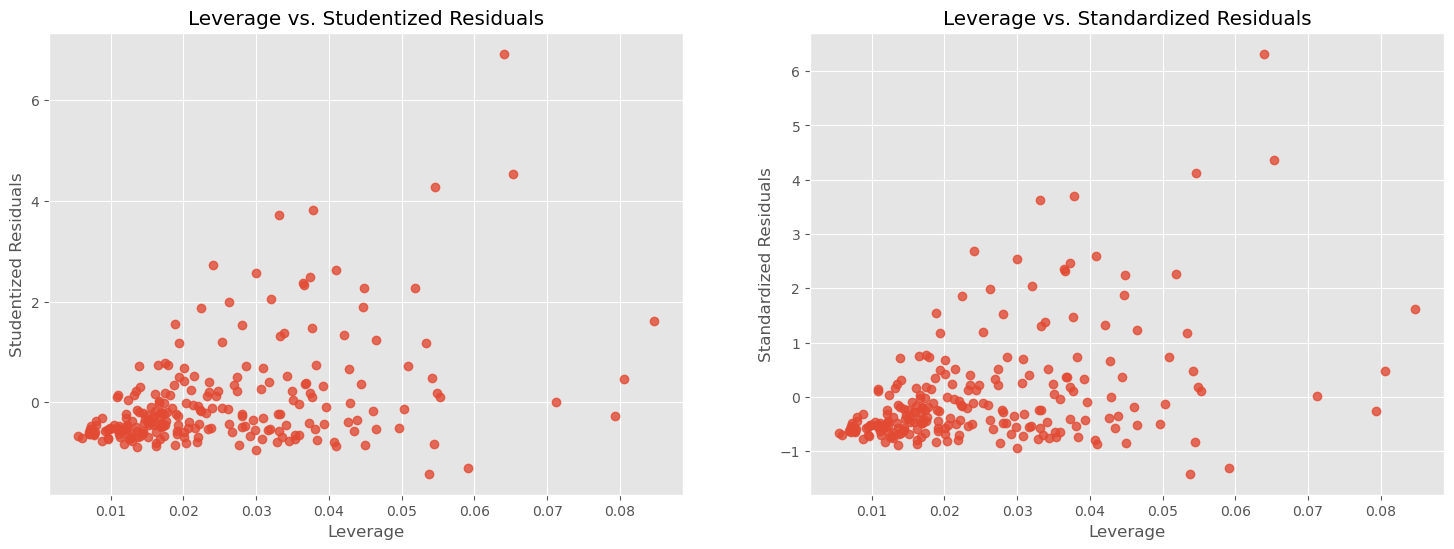

In [508]:
fig = plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.regplot(y_inf_df['hat_diag'],y_inf_df['student_resid'] ,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.subplot(1,2,2)

sns.regplot(y_inf_df['hat_diag'],y_inf_df['standard_resid'] ,  fit_reg=False)
plt.title('Leverage vs. Standardized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')

plt.show()

##  Calculating Studentized Deleted Residuals

In [509]:
y_inf_df_t.head()

dfb_const    dfb_V4    dfb_V5    dfb_V1   dfb_V10    dfb_V8   cooks_d  \
232   0.001121 -0.019030  0.002192  0.009781  0.011594  0.012775  0.000274   
59   -0.015481  0.011285  0.020396 -0.009110  0.016959  0.013441  0.000418   
6     0.011592 -0.024508 -0.063188  0.039072  0.007120 -0.025615  0.001264   
185   0.029727 -0.032432  0.002925 -0.026549 -0.012692  0.031644  0.000605   
173   0.014438  0.006369  0.031685 -0.015665  0.019779 -0.049495  0.000914   

     standard_resid  hat_diag  dffits_internal  student_resid    dffits  
232       -0.452036  0.007983        -0.040551      -0.451266 -0.040482  
59        -0.596600  0.006992        -0.050062      -0.595777 -0.049992  
6         -0.430597  0.039282        -0.087071      -0.429847 -0.086919  
185        0.421475  0.020034         0.060262       0.420733  0.060156  
173       -0.511221  0.020557        -0.074062      -0.510413 -0.073945

In [510]:
d1 = 233/(SSE*(1-y_inf_df_t['hat_diag'])-(ei**2))
di = ei*(d1**(1/2))

In [511]:
y_inf_df['di'] = di
y_inf_df.head()

standard_resid  hat_diag  student_resid           e_i        di
232       -0.452036  0.007983      -0.451266 -3.054031e+06 -0.451266
59        -0.596600  0.006992      -0.595777 -4.032741e+06 -0.595777
6         -0.430597  0.039282      -0.429847 -2.862927e+06 -0.429847
185        0.421475  0.020034       0.420733  2.830208e+06  0.420733
173       -0.511221  0.020557      -0.510413 -3.431940e+06 -0.510413

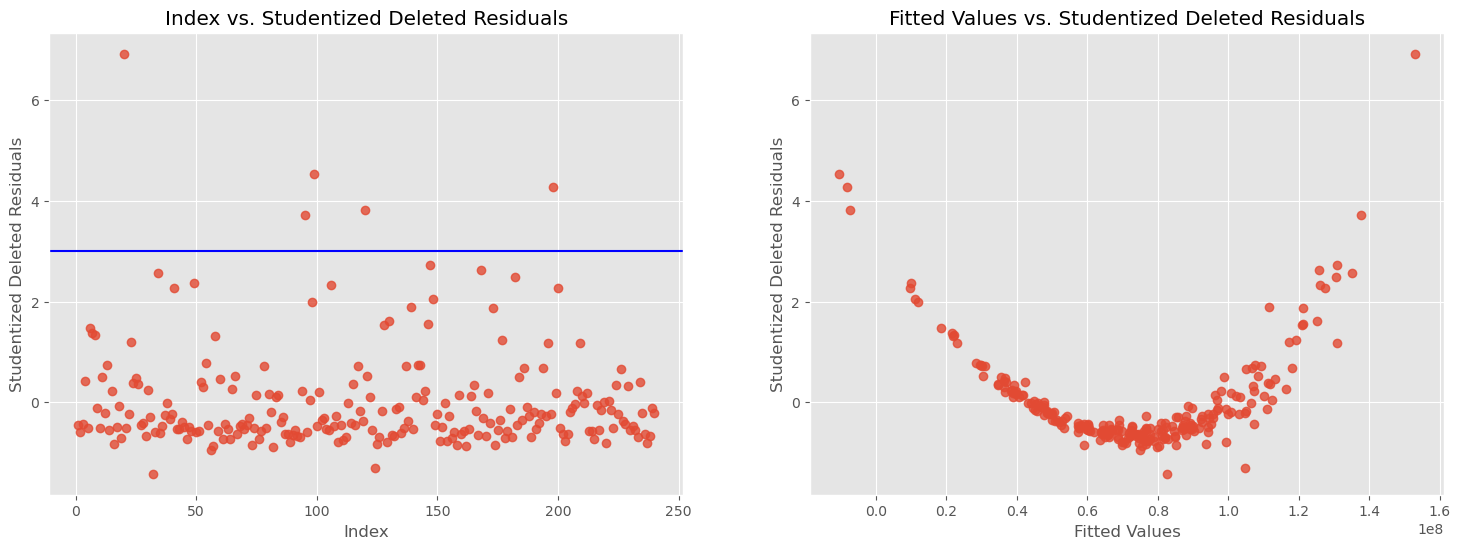

In [533]:
## plotting Studentized Deleted Residuals V|S Index
a = np.array(range(1,241))
fig = plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.regplot(a, di,  fit_reg=False)
plt.axhline(y=3, color='b', linestyle='-')
plt.title('Index vs. Studentized Deleted Residuals')
plt.xlabel('Index')
plt.ylabel('Studentized Deleted Residuals')

plt.subplot(1,2,2)
## plotting Studentized Deleted Residuals V|S Fitted Values
sns.regplot(data_OLS_result_M1_i.fittedvalues, di,  fit_reg=False)
plt.title('Fitted Values vs. Studentized Deleted Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Deleted Residuals')

plt.show()

## Identifying the Index of Observation in Y

### Criteria = If Studentized Deleted Residuals >=3 then it said to be outlier

In [513]:

# Filter the column to only include values greater than 5
filtered_column_di = y_inf_df['di'][abs(y_inf_df['di']) > 3]
filtered_column_di

288    6.927341
280    3.720156
198    4.545367
141    3.813676
80     4.275942
Name: di, dtype: float64

## Identifying Outlyiug X Observations-Hat Matrix:  Leverage Values


## Use of Diagonal Elements of The Hat matrix : h_ii

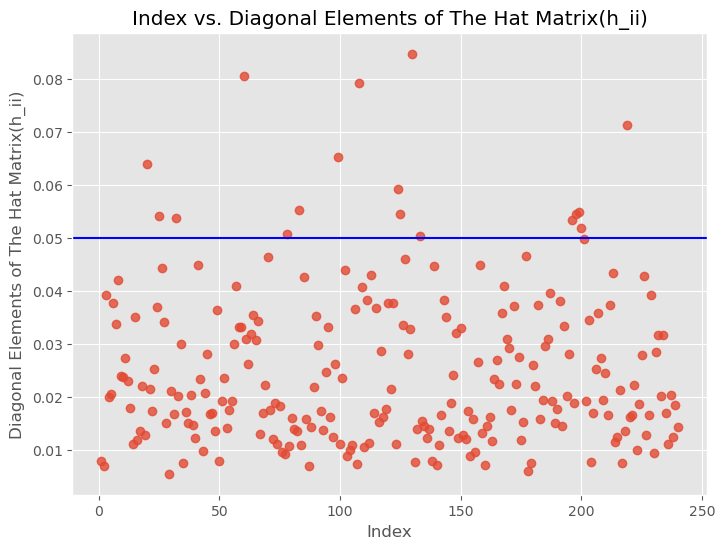

In [532]:
h_ii = y_inf_df['hat_diag']
## Plotting the h_ii values 
a = np.array(range(1,241))
fig = plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.regplot(a, h_ii,  fit_reg=False)
plt.axhline(y=0.050, color='b', linestyle='-')
plt.title('Index vs. Diagonal Elements of The Hat Matrix(h_ii)')
plt.xlabel('Index')
plt.ylabel('Diagonal Elements of The Hat Matrix(h_ii)')
plt.show()

In [515]:
thresold_value = 2*6/240
thresold_value

0.05

## Thresold Value= $2p/n=2*6/140=0.05$

In [516]:
filtered_column_hii = y_inf_df['hat_diag'][abs(y_inf_df['hat_diag']) > 0.05 ]
filtered_column_hii

288    0.063997
79     0.054111
101    0.053710
206    0.080539
176    0.050810
177    0.055285
198    0.065343
254    0.079281
272    0.059152
100    0.054441
36     0.084737
236    0.050316
103    0.053333
80     0.054523
205    0.054885
34     0.051869
48     0.071211
Name: hat_diag, dtype: float64

# Identifying Influential Cases-DFFITS, $Cook's$ ,Distance and DFBETAS Measures
## 1. $Cook'd$

In [520]:
inf_cases= y_inf_df_t[['dfb_const','dfb_V4','dfb_V5','dfb_V1','dfb_V10','dfb_V8','cooks_d','dffits']]
inf_cases.head()

dfb_const    dfb_V4    dfb_V5    dfb_V1   dfb_V10    dfb_V8   cooks_d  \
232   0.001121 -0.019030  0.002192  0.009781  0.011594  0.012775  0.000274   
59   -0.015481  0.011285  0.020396 -0.009110  0.016959  0.013441  0.000418   
6     0.011592 -0.024508 -0.063188  0.039072  0.007120 -0.025615  0.001264   
185   0.029727 -0.032432  0.002925 -0.026549 -0.012692  0.031644  0.000605   
173   0.014438  0.006369  0.031685 -0.015665  0.019779 -0.049495  0.000914   

       dffits  
232 -0.040482  
59  -0.049992  
6   -0.086919  
185  0.060156  
173 -0.073945

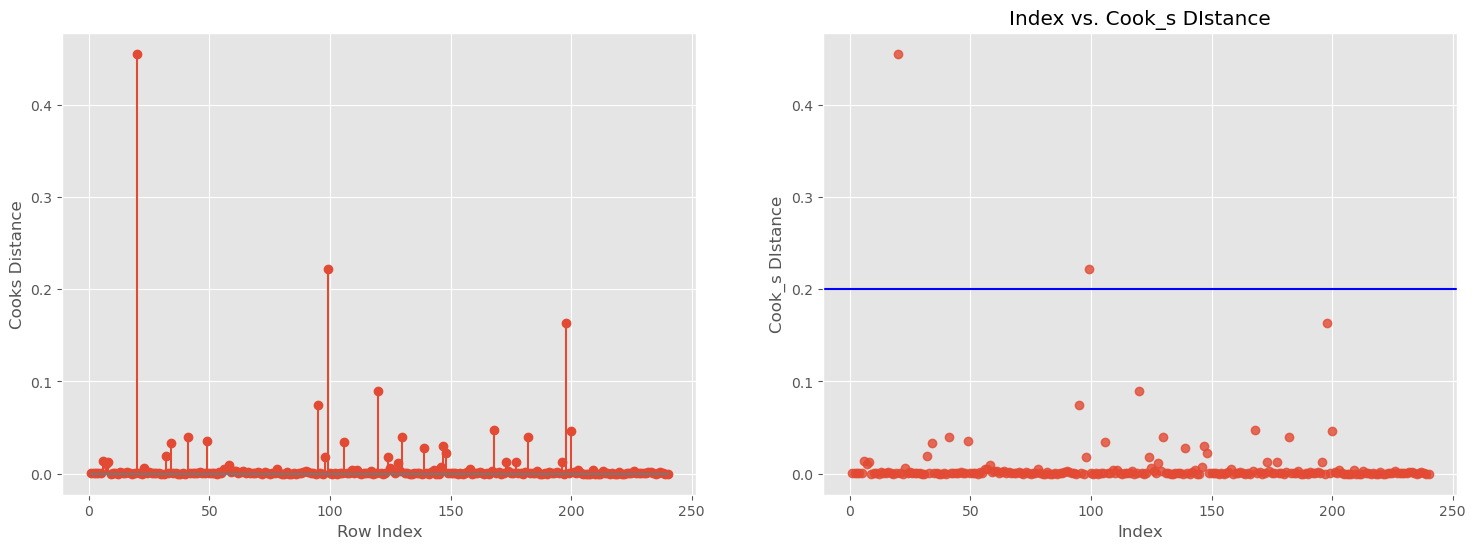

In [530]:
## Plotting Cooks distance 
# Plot the influencers using the stem plot
a = np.array(range(1,241))
fig = plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.stem(a,inf_cases['cooks_d'])
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

##
cok_d = inf_cases['cooks_d']
a = np.array(range(1,241))
plt.subplot(1,2,2)
sns.regplot(a, cok_d,  fit_reg=False)
plt.axhline(y=0.20, color='b', linestyle='-')
plt.title('Index vs. Cook_s DIstance')
plt.xlabel('Index')
plt.ylabel('Cook_s DIstance')
plt.show()


In [522]:
filtered_column_cok_d = inf_cases['cooks_d'][abs(inf_cases['cooks_d']) > 0.20 ]
filtered_column_cok_d

288    0.455396
198    0.222072
Name: cooks_d, dtype: float64

## 2. $DIFITS$

### THERSOLD Value = $2*Sqrt(p/n)=2*sqrt(6/240)=0.316227$

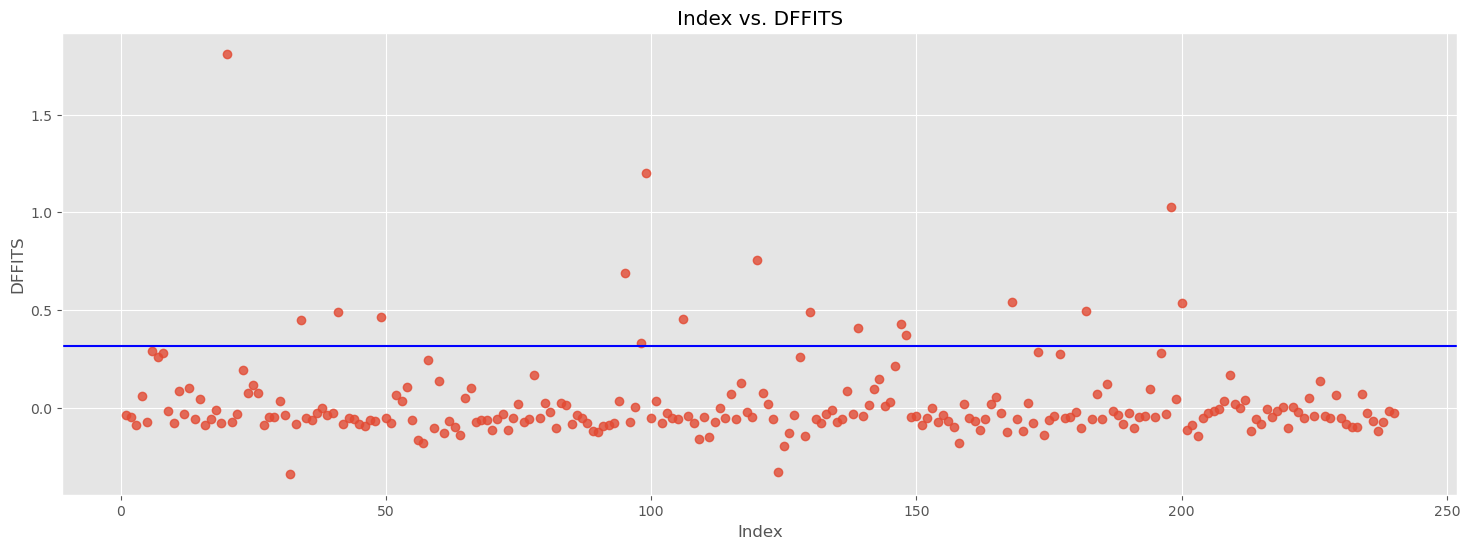

In [528]:
dffit_s = inf_cases['dffits']
a = np.array(range(1,241))
fig = plt.figure(figsize = (18,6))
sns.regplot(a, dffit_s,  fit_reg=False)
plt.axhline(y=0.316227, color='b', linestyle='-')
plt.title('Index vs. DFFITS')
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.show()

In [526]:
filtered_column_dffits = inf_cases['dffits'][abs(inf_cases['dffits']) > 0.316227 ]
filtered_column_dffits

288    1.811366
101   -0.338554
224    0.449668
228    0.489979
181    0.462417
280    0.688885
65     0.328063
198    1.201825
142    0.455084
141    0.755634
272   -0.328201
36     0.491748
27     0.408947
285    0.427904
138    0.372313
81     0.542932
201    0.492066
80     1.026825
34     0.533212
Name: dffits, dtype: float64

##  3. $DFBETA$

### THERSOLD Value = $2*Sqrt(p+1)/(n-p-1)=2*sqrt(7)/233=0.346667$

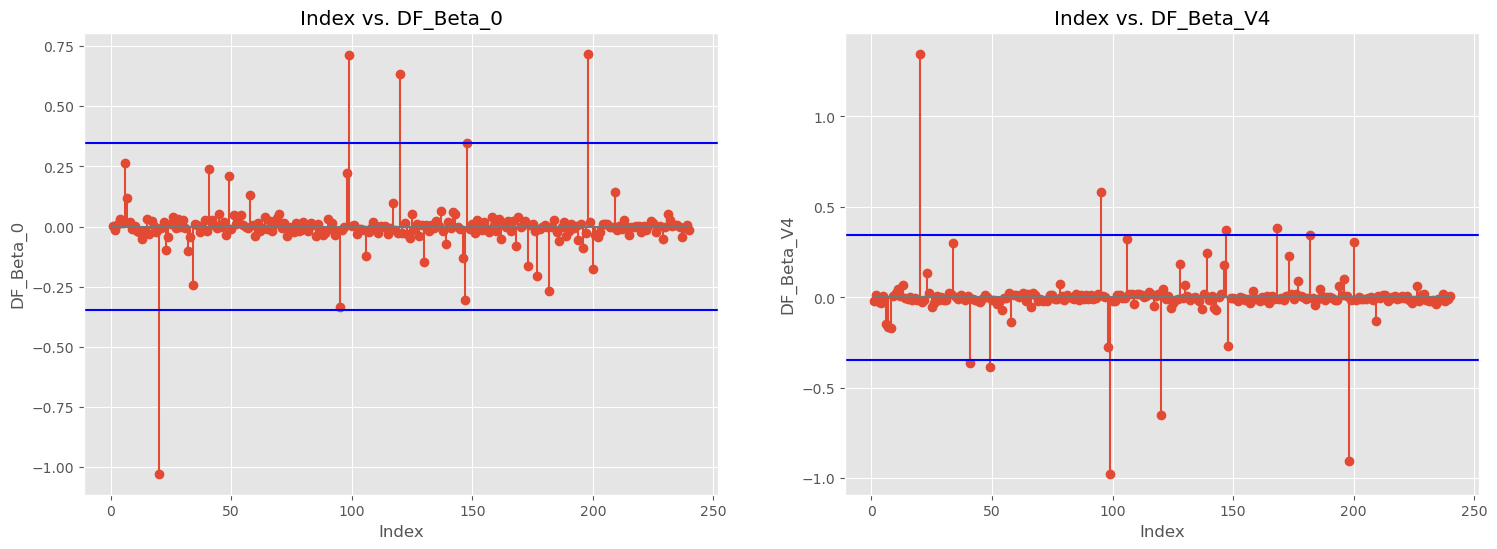

In [543]:
dfbeta_0 = inf_cases['dfb_const']
a = np.array(range(1,241))

fig = plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.stem(a,dfbeta_0)
plt.axhline(y=0.346667, color='b', linestyle='-')
plt.axhline(y=-0.346667, color='b', linestyle='-')
plt.title('Index vs. DF_Beta_0')
plt.xlabel('Index')
plt.ylabel('DF_Beta_0')
##
plt.subplot(1,2,2)
plt.stem(a,inf_cases['dfb_V4'])
plt.axhline(y=0.346667, color='b', linestyle='-')
plt.axhline(y=-0.346667, color='b', linestyle='-')
plt.title('Index vs. DF_Beta_V4')
plt.xlabel('Index')
plt.ylabel('DF_Beta_V4')
plt.show()

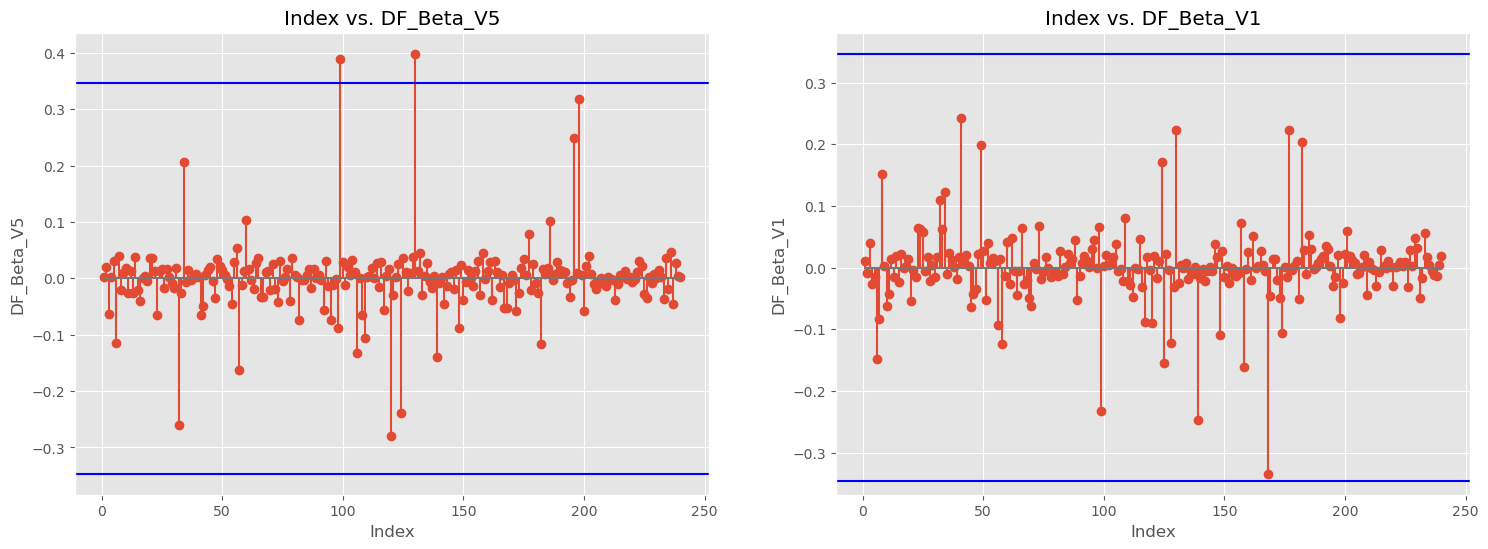

In [547]:
a = np.array(range(1,241))

fig = plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.stem(a,inf_cases['dfb_V5'])
plt.axhline(y=0.346667, color='b', linestyle='-')
plt.axhline(y=-0.346667, color='b', linestyle='-')
plt.title('Index vs. DF_Beta_V5')
plt.xlabel('Index')
plt.ylabel('DF_Beta_V5')
##
plt.subplot(1,2,2)
plt.stem(a,inf_cases['dfb_V1'])
plt.axhline(y=0.346667, color='b', linestyle='-')
plt.axhline(y=-0.346667, color='b', linestyle='-')
plt.title('Index vs. DF_Beta_V1')
plt.xlabel('Index')
plt.ylabel('DF_Beta_V1')
plt.show()

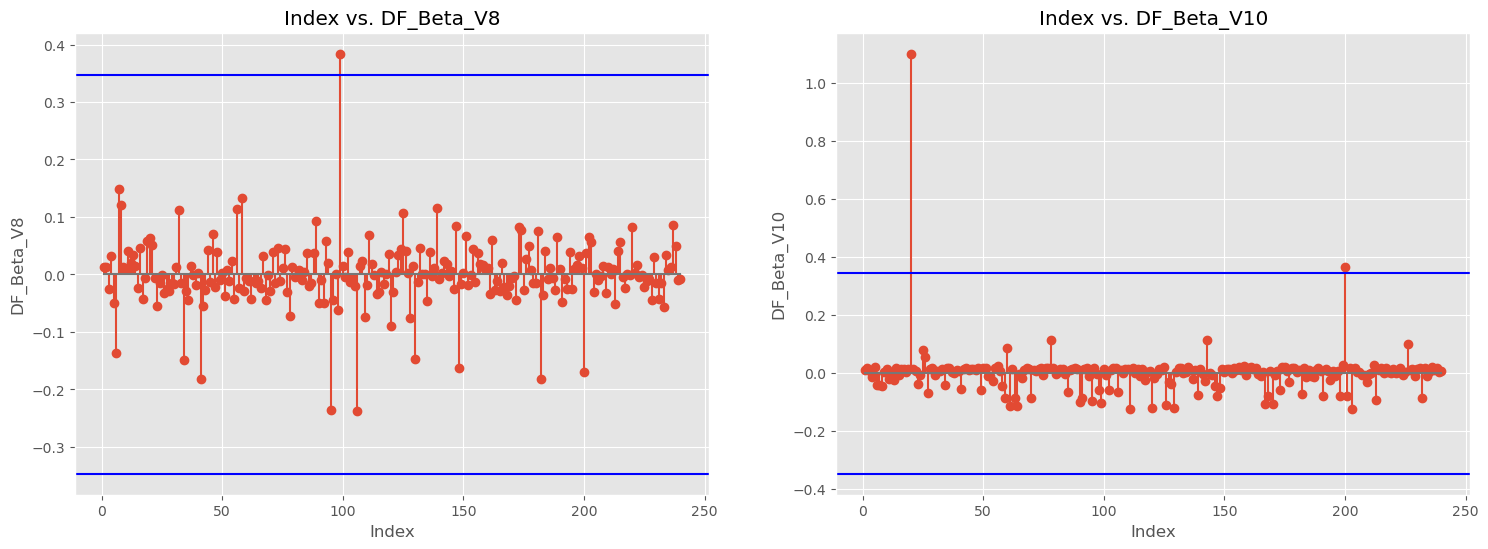

In [548]:
a = np.array(range(1,241))

fig = plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.stem(a,inf_cases['dfb_V8'])
plt.axhline(y=0.346667, color='b', linestyle='-')
plt.axhline(y=-0.346667, color='b', linestyle='-')
plt.title('Index vs. DF_Beta_V8')
plt.xlabel('Index')
plt.ylabel('DF_Beta_V8')
##
plt.subplot(1,2,2)
plt.stem(a,inf_cases['dfb_V10'])
plt.axhline(y=0.346667, color='b', linestyle='-')
plt.axhline(y=-0.346667, color='b', linestyle='-')
plt.title('Index vs. DF_Beta_V10')
plt.xlabel('Index')
plt.ylabel('DF_Beta_V10')
plt.show()

In [550]:
pot_ob_dfbeta_0 = inf_cases['dfb_const'][abs(inf_cases['dfb_const']) > 0.346667 ]
pot_ob_dfbeta_V4 = inf_cases['dfb_V4'][abs(inf_cases['dfb_V4']) > 0.346667 ]
pot_ob_dfbeta_V5 = inf_cases['dfb_V5'][abs(inf_cases['dfb_V5']) > 0.346667 ]
pot_ob_dfbeta_V1 = inf_cases['dfb_V1'][abs(inf_cases['dfb_V1']) > 0.346667 ]
pot_ob_dfbeta_V10 = inf_cases['dfb_V10'][abs(inf_cases['dfb_V10']) > 0.346667 ]
pot_ob_dfbeta_V8 = inf_cases['dfb_V8'][abs(inf_cases['dfb_V8']) > 0.346667 ]


In [562]:
print(pot_ob_dfbeta_0,pot_ob_dfbeta_V4,pot_ob_dfbeta_V5,pot_ob_dfbeta_V1,pot_ob_dfbeta_V10,pot_ob_dfbeta_V8)

288   -1.028718
198    0.715207
141    0.634918
138    0.348762
80     0.719053
Name: dfb_const, dtype: float64 288    1.346715
228   -0.361075
181   -0.385700
280    0.580858
198   -0.974291
141   -0.647431
285    0.372216
81     0.385613
80    -0.903996
Name: dfb_V4, dtype: float64 198    0.388563
36     0.398705
Name: dfb_V5, dtype: float64 Series([], Name: dfb_V1, dtype: float64) 288    1.101243
34     0.365745
Name: dfb_V10, dtype: float64 198    0.383965
Name: dfb_V8, dtype: float64


###  Final Index of Potential Outlyers and Ifluential variables

$ Index N0 = {288,198}$

### So let’s use the findings.  I fitted two different regression models.  First, I removed the observations that were deemed influential and fitted an OLS model.  Second, I removed all outliers, and then fitted another OLS model.  

## Fitting the model after removing the comman outliers in X and Y

In [579]:
x_train.head()
#x_test.head()

const         V4        V5        V1  V10        V8
232    1.0  20.920804  1.167454  2.231040    0  4.440757
59     1.0  17.686327  0.985498  2.361271    0  4.652120
6      1.0  21.210582  1.651609  1.962035    0  5.793514
185    1.0  14.459627  1.225306  2.092715    0  6.339646
173    1.0  18.063827  0.460088  2.446717    0  6.948482

In [581]:
#y_test_trans_box.head()
y_train_trans_box.head()

232    896.271260
59     791.873528
6      950.375556
185    701.781582
173    787.639832
Name: Y, dtype: float64

## Removing potential outliers


In [582]:
x_train_new=x_train.drop([288,280,198,141,80])
#boston_alt_y=boston_target_df.drop([163,253,364,365,367,368,369,370,412,414])

In [583]:
y_train_trans_box_new=y_train_trans_box.drop([288,280,198,141,80])


In [584]:
## Model Building

In [585]:
## fitting the transformed model
import statsmodels.api as data_stat_model  
x_train_new = data_stat_model.add_constant(x_train_new) 
data_OLS_result_new = data_stat_model.OLS(y_train_trans_box_new, x_train_new).fit() 
data_OLS_result_new.params.sort_values(ascending=False) 
print(data_OLS_result_new.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2909.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          5.69e-205
Time:                        01:44:10   Log-Likelihood:                -927.08
No. Observations:                 235   AIC:                             1866.
Df Residuals:                     229   BIC:                             1887.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.4070     10.722      7.126      0.0

## Checking for ERror Assumption

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


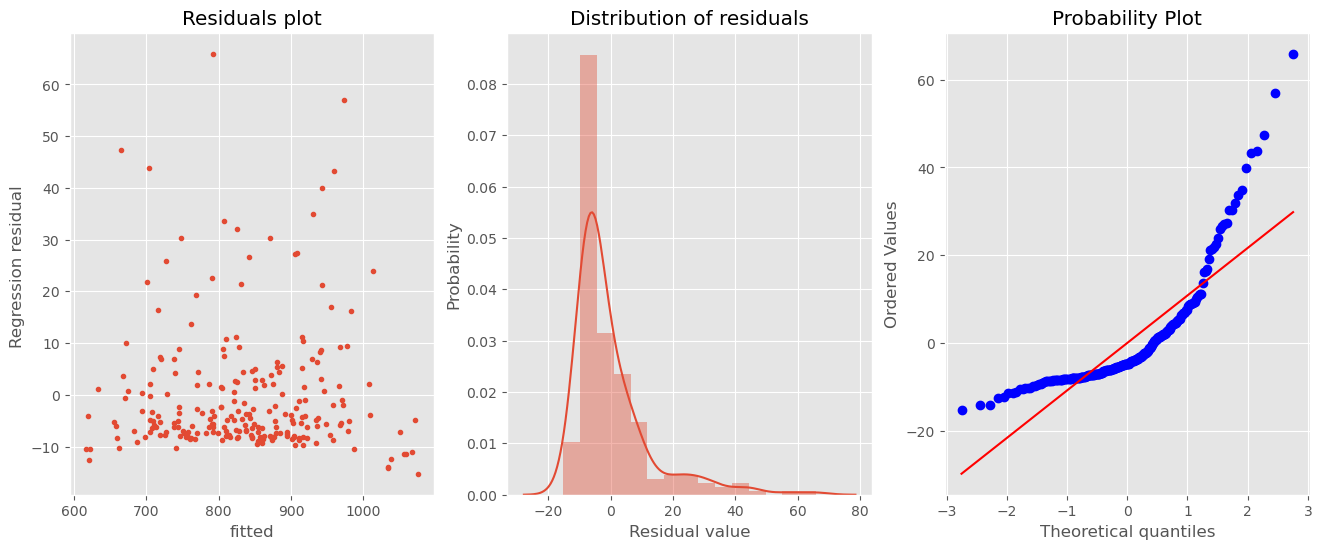

In [586]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(data_OLS_result_new.fittedvalues,data_OLS_result_new.resid, marker = '.', linestyle = 'none')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(data_OLS_result_new.resid,ax = ax2, bins = 15)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(data_OLS_result_new.resid, dist = "norm", plot = plt)
plt.show()

## Making Prediction with Improved Model

In [588]:
x_test = data_stat_model.add_constant(x_test)

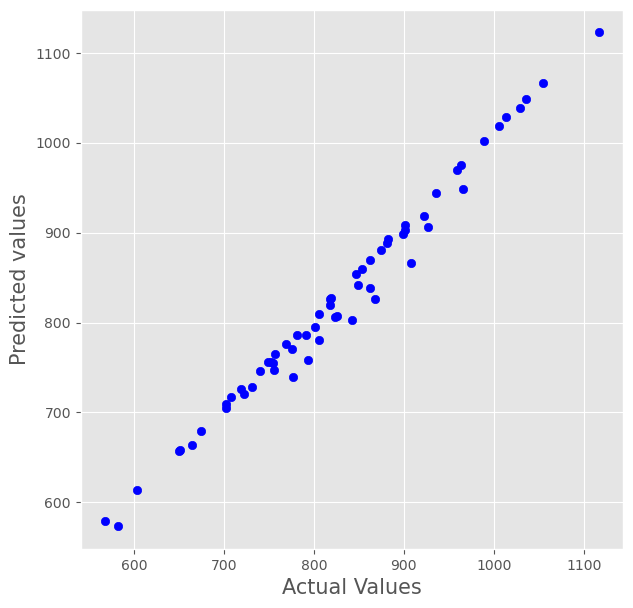

In [589]:
plt.figure(figsize=(7,7))
plt.scatter(y_test_trans_box, data_OLS_result_new.predict(x_test), c='blue')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.grid(True)
plt.show()

#### The next step is to identify outliers using studentized residuals. 
Studentized residuals could be concerning when their absolute values exceed 2. 
This is an aggressive stance and one could relax this criteria and consider studentized residuals exceeding 3 as an outlier.
Anyway, below I printed the top 5 negative residuals below. 

## Model Fitting after removig multicollnearity

### $ X=[V4,V5,V10]$

In [590]:
x_train_new.head()

const         V4        V5        V1  V10        V8
232    1.0  20.920804  1.167454  2.231040    0  4.440757
59     1.0  17.686327  0.985498  2.361271    0  4.652120
6      1.0  21.210582  1.651609  1.962035    0  5.793514
185    1.0  14.459627  1.225306  2.092715    0  6.339646
173    1.0  18.063827  0.460088  2.446717    0  6.948482

In [606]:
x_train_new_rm = x_train_new[['const','V4','V5','V10']]
x_train_new_rm.head()

const         V4        V5  V10
232    1.0  20.920804  1.167454    0
59     1.0  17.686327  0.985498    0
6      1.0  21.210582  1.651609    0
185    1.0  14.459627  1.225306    0
173    1.0  18.063827  0.460088    0

In [591]:
x_test.head()

const         V4        V5        V1  V10        V8
203    1.0  15.894249  1.796243  2.176804    0  6.935544
266    1.0  25.563623  0.943924  2.708573    0  5.825580
152    1.0  23.389329  0.893084  2.458414    0  2.838690
9      1.0  21.773372  0.763234  2.265415    0  5.935836
233    1.0  17.052064  1.557767  2.605792    0  6.266421

In [609]:
x_test_new_rm = x_test[['const','V4','V5','V10']]
x_test_new_rm.head()

const         V4        V5  V10
203    1.0  15.894249  1.796243    0
266    1.0  25.563623  0.943924    0
152    1.0  23.389329  0.893084    0
9      1.0  21.773372  0.763234    0
233    1.0  17.052064  1.557767    0

In [595]:
y_train_trans_box_new.head()

232    896.271260
59     791.873528
6      950.375556
185    701.781582
173    787.639832
Name: Y, dtype: float64

In [601]:
y_test_trans_box_new=y_test_trans_box
y_test_trans_box_new.shape

(60,)

In [602]:
## Model Building

In [610]:
## fitting the transformed model
import statsmodels.api as data_stat_model   
data_OLS_result_new_rm = data_stat_model.OLS(y_train_trans_box_new, x_train_new_rm).fit() 
data_OLS_result_new_rm.params.sort_values(ascending=False) 
print(data_OLS_result_new_rm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2822.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.18e-181
Time:                        02:45:14   Log-Likelihood:                -990.35
No. Observations:                 235   AIC:                             1989.
Df Residuals:                     231   BIC:                             2003.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.0054      7.492     24.292      0.0

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


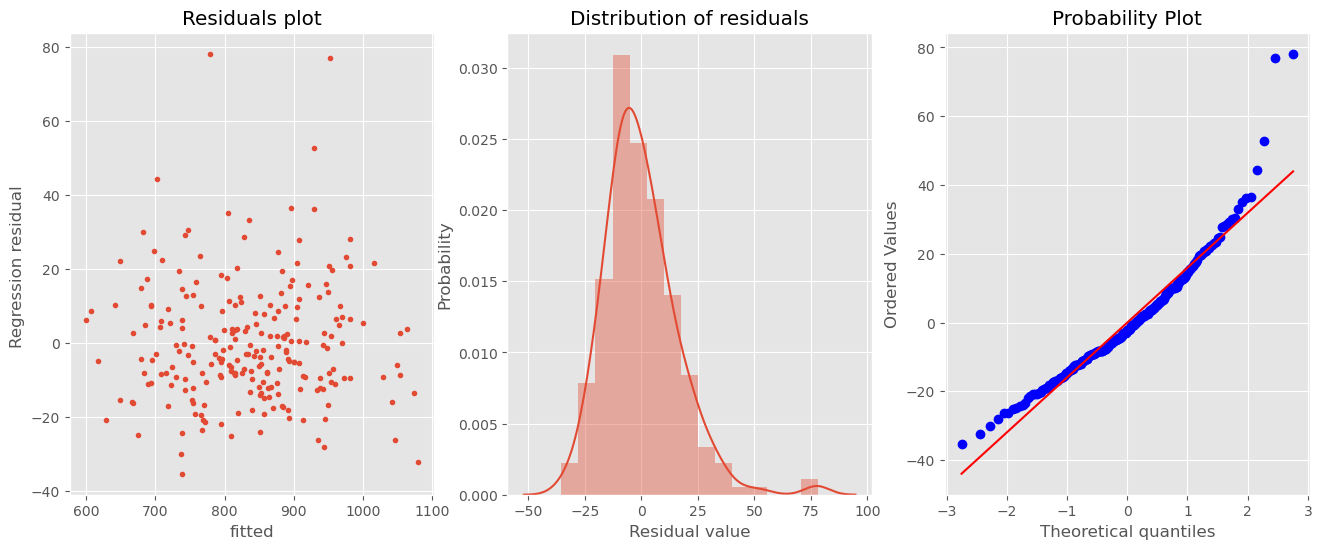

In [611]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(data_OLS_result_new_rm.fittedvalues,data_OLS_result_new_rm.resid, marker = '.', linestyle = 'none')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(data_OLS_result_new_rm.resid,ax = ax2, bins = 15)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(data_OLS_result_new_rm.resid, dist = "norm", plot = plt)
plt.show()

### Making prediction with improved model

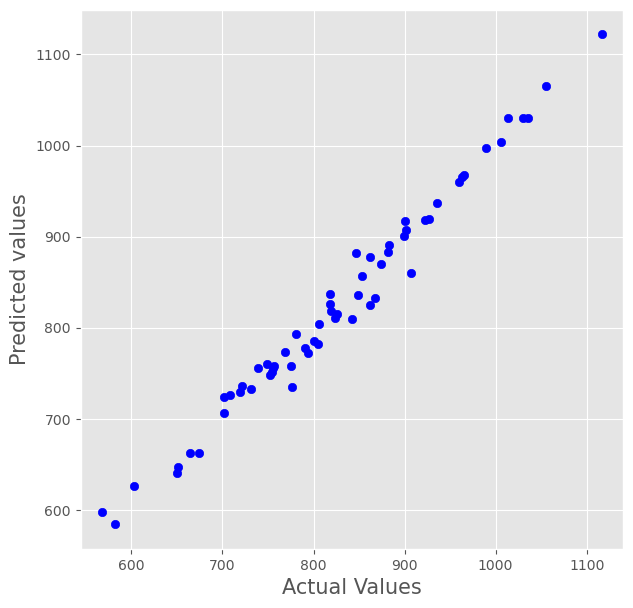

In [612]:
plt.figure(figsize=(7,7))
plt.scatter(y_test_trans_box_new, data_OLS_result_new_rm.predict(x_test_new_rm), c='blue')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.grid(True)
plt.show()